# **Data Preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/content/4A_TB_cleaned.xlsx')

In [3]:
data.shape

(16368, 18)

In [4]:
data = pd.concat([data] * 4, ignore_index=True)

In [5]:
data.shape

(65472, 18)

In [6]:
data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1


In [7]:
# Converting duration to whole weeks (assuming 7 days per week)
data['Duration (weeks)'] = data['DURATION'].apply(lambda x: int(x // 7 + (x % 7 > 0)))
data['Row\'s week'] = [1, 2, 3, 4] * (len(data) // 4)

In [8]:
# function to calculate the survival status
def calculate_survival_status(row):
    if row['OUT COME'] == 'DIED':
        return 1 if row['Row\'s week'] >= row['Duration (weeks)'] else 0
    else:
        return 0 if row['Row\'s week'] <= row['Duration (weeks)'] else None


data['WEEK'] = data.apply(calculate_survival_status, axis=1)


In [9]:
data.drop(columns=['UNIT','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS','ADDITIONAL WORKING DIAGNOSIS',
                   'MARITAL STATUS', 'IP NUMBER', 'OUT COME', 'Duration (weeks)', 'Row\'s week'], inplace=True)



new_col_order = ['SEX', 'AGE', 'RELIGION', 'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'TB_type',
                 'NUMBER OF PREVIOUS ADMISSIONS', 'DAY OF ADMISSION', 'MONTH OF ADMISSION',
                 'YEAR OF ADMISSION', 'DURATION', 'WEEK']
data = data[new_col_order]

In [10]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,WEEK
0,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,0.0
1,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
2,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
3,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
4,F,46,COU,CENTRAL,1,Disseminated TB,3,Monday,December,2010,4,0.0


In [11]:
data.dropna(subset=['WEEK'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['WEEK'] = data['WEEK'].astype(int)

In [12]:
data.shape

(39064, 12)

In [13]:
data['WEEK'].value_counts()

WEEK
0    20864
1    18200
Name: count, dtype: int64

#**Preprocessing**

In [14]:
# dictionary for month encoding
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# dictionary for day of week encoding
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':76 }

data['Month of Admission'] = data['MONTH OF ADMISSION'].map(month_mapping)
data['Day of Admission'] = data['DAY OF ADMISSION'].map(day_mapping)

data.drop(columns=['MONTH OF ADMISSION', 'DAY OF ADMISSION'], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

textual_columns = ['SEX', 'RELIGION', 'TB_type', 'REGION']

# Encoding textual data
encoder = LabelEncoder()
for col in textual_columns:
    data[col] = encoder.fit_transform(data[col])

In [16]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,WEEK,Month of Admission,Day of Admission
0,1,30,1,0,1,0,5,2010,6,0,11,3
1,0,46,1,0,1,2,3,2010,4,0,12,2
2,1,80,2,0,2,0,7,2010,8,0,12,4
3,1,80,2,0,2,0,7,2010,8,0,12,4
4,1,22,0,0,0,0,8,2010,9,0,12,2


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

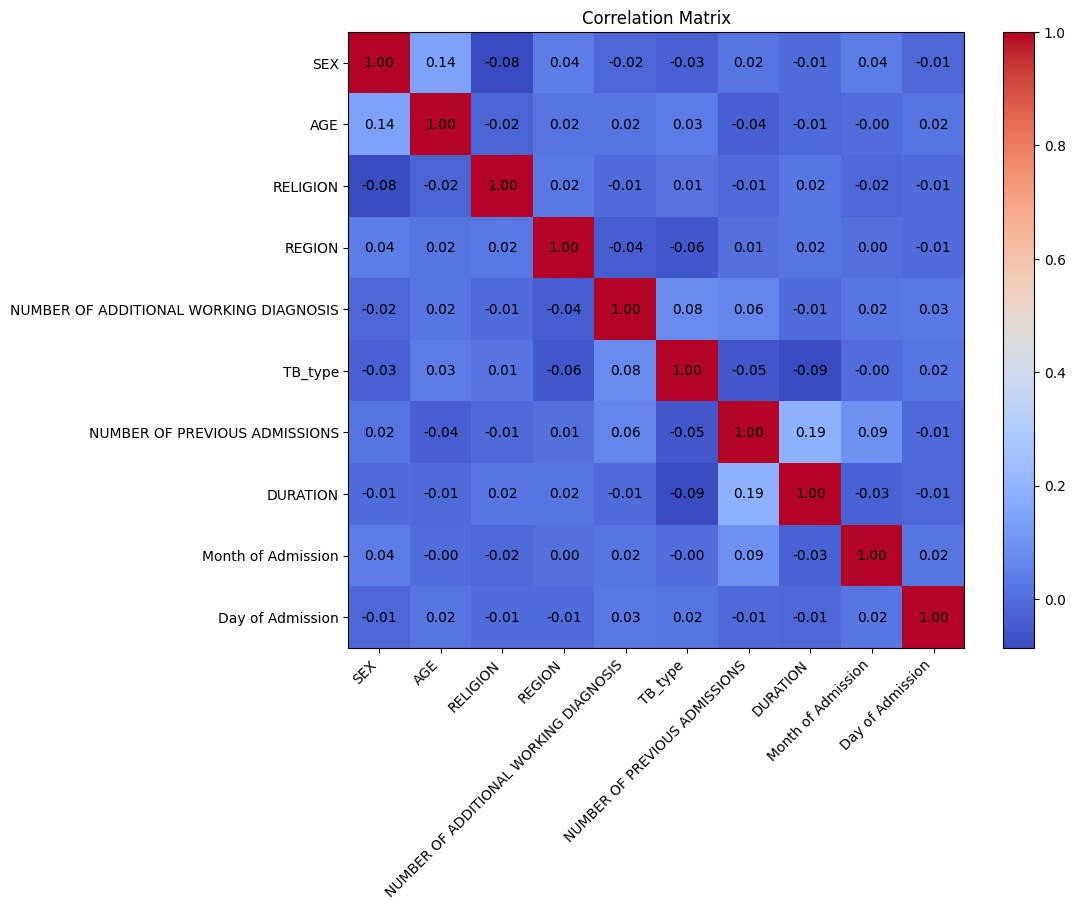

In [18]:
columns = ['SEX', 'AGE', 'RELIGION', 'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS',
           'TB_type', 'NUMBER OF PREVIOUS ADMISSIONS', 'DURATION', 'Month of Admission', 'Day of Admission']
correlation_matrix = data[columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

for i in range(len(columns)):
    for j in range(len(columns)):
        plt.text(i, j, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# from sklearn.preprocessing import MinMaxScaler

# #Normalizing and Standardizing continuous features
# normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
# scaler = MinMaxScaler()
# data[normalise_features] = scaler.fit_transform(data[normalise_features])

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a NumPy array or pandas DataFrame named 'data'
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and standard deviation)
scaler.fit(data)

# Transform the data using the fitted scaler (center and scale)
standardized_data = scaler.transform(data)


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a NumPy array or pandas DataFrame named 'data'
scaler = StandardScaler()
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
data[normalise_features] = scaler.fit_transform(data[normalise_features])

In [22]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,WEEK,Month of Admission,Day of Admission
0,1,-0.499157,1,0,-0.768999,0,0.671691,2010,-0.376849,0,11,3
1,0,0.973860,1,0,-0.768999,2,0.263214,2010,-0.588397,0,12,2
2,1,4.104020,2,0,0.514769,0,1.080168,2010,-0.165300,0,12,4
3,1,4.104020,2,0,0.514769,0,1.080168,2010,-0.165300,0,12,4
4,1,-1.235665,0,0,-2.052767,0,1.284406,2010,-0.059526,0,12,2


# **Modal Training**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

Epoch 1/100
245/245 [==============================] - 0s 2ms/step
Epoch 1: Avg F1-Score: 0.1759, Avg AUPRC: 0.2636
1040/1040 [==============================] - 12s 5ms/step - loss: 50.7563 - week_1_loss: 19.4795 - week_2_loss: 22.8906 - week_3_loss: 0.8966 - week_4_loss: 7.4896 - week_1_accuracy: 0.5025 - week_2_accuracy: 0.5059 - week_3_accuracy: 0.9892 - week_4_accuracy: 0.9655 - val_loss: 1.6625 - val_week_1_loss: 0.8520 - val_week_2_loss: 0.8105 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.2636
Epoch 2/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.8020 - week_1_loss: 0.8547 - week_2_loss: 0.8298 - week_3_loss: 0.0059 - week_4_loss: 0.1116 - week_1_accuracy: 0.5106 - week_2_accuracy: 0.5173 - week_3_accuracy: 0.9994 - week_4_accuracy: 0.9950

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 2: Avg F1-Score: 0.1759, Avg AUPRC: 0.3488
1040/1040 [==============================] - 4s 4ms/step - loss: 1.6188 - week_1_loss: 0.7693 - week_2_loss: 0.7589 - week_3_loss: 0.0089 - week_4_loss: 0.0818 - week_1_accuracy: 0.5021 - week_2_accuracy: 0.5152 - week_3_accuracy: 0.9994 - week_4_accuracy: 0.9980 - val_loss: 1.5164 - val_week_1_loss: 0.7608 - val_week_2_loss: 0.7556 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3488
Epoch 3/100
  52/1040 [>.............................] - ETA: 3s - loss: 1.6553 - week_1_loss: 0.8214 - week_2_loss: 0.7898 - week_3_loss: 9.6959e-10 - week_4_loss: 0.0441 - week_1_accuracy: 0.4982 - week_2_accuracy: 0.5180 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9988

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 3: Avg F1-Score: 0.1837, Avg AUPRC: 0.3564
1040/1040 [==============================] - 6s 6ms/step - loss: 1.5222 - week_1_loss: 0.7524 - week_2_loss: 0.7387 - week_3_loss: 0.0028 - week_4_loss: 0.0284 - week_1_accuracy: 0.5109 - week_2_accuracy: 0.5327 - week_3_accuracy: 0.9997 - week_4_accuracy: 0.9991 - val_loss: 1.3357 - val_week_1_loss: 0.6775 - val_week_2_loss: 0.6582 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5483 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1837 - val_avg_auprc: 0.3564
Epoch 4/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.6095 - week_1_loss: 0.7798 - week_2_loss: 0.7785 - week_3_loss: 7.5288e-05 - week_4_loss: 0.0511 - week_1_accuracy: 0.5090 - week_2_accuracy: 0.5256 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9986

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 4: Avg F1-Score: 0.2241, Avg AUPRC: 0.3628
1040/1040 [==============================] - 4s 4ms/step - loss: 1.4611 - week_1_loss: 0.7263 - week_2_loss: 0.7203 - week_3_loss: 8.8953e-04 - week_4_loss: 0.0136 - week_1_accuracy: 0.5285 - week_2_accuracy: 0.5436 - week_3_accuracy: 0.9998 - week_4_accuracy: 0.9994 - val_loss: 1.3579 - val_week_1_loss: 0.6875 - val_week_2_loss: 0.6704 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5204 - val_week_2_accuracy: 0.5655 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2241 - val_avg_auprc: 0.3628
Epoch 5/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.3940 - week_1_loss: 0.6989 - week_2_loss: 0.6951 - week_3_loss: 1.0460e-08 - week_4_loss: 1.9982e-11 - week_1_accuracy: 0.5461 - week_2_accuracy: 0.5551 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 5: Avg F1-Score: 0.2799, Avg AUPRC: 0.3713
1040/1040 [==============================] - 4s 4ms/step - loss: 1.3715 - week_1_loss: 0.6844 - week_2_loss: 0.6824 - week_3_loss: 4.3486e-04 - week_4_loss: 0.0042 - week_1_accuracy: 0.5632 - week_2_accuracy: 0.5682 - week_3_accuracy: 0.9999 - week_4_accuracy: 0.9996 - val_loss: 1.2440 - val_week_1_loss: 0.6242 - val_week_2_loss: 0.6199 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.6141 - val_week_2_accuracy: 0.6268 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2799 - val_avg_auprc: 0.3713
Epoch 6/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.3882 - week_1_loss: 0.6940 - week_2_loss: 0.6939 - week_3_loss: 2.7714e-04 - week_4_loss: 4.4401e-05 - week_1_accuracy: 0.5656 - week_2_accuracy: 0.5681 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 6: Avg F1-Score: 0.3294, Avg AUPRC: 0.3718
1040/1040 [==============================] - 6s 5ms/step - loss: 1.3312 - week_1_loss: 0.6650 - week_2_loss: 0.6646 - week_3_loss: 2.2109e-04 - week_4_loss: 0.0013 - week_1_accuracy: 0.5860 - week_2_accuracy: 0.5882 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9997 - val_loss: 1.2552 - val_week_1_loss: 0.6278 - val_week_2_loss: 0.6274 - val_week_3_loss: 9.6597e-18 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.6645 - val_week_2_accuracy: 0.6648 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3294 - val_avg_auprc: 0.3718
Epoch 7/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.3506 - week_1_loss: 0.6747 - week_2_loss: 0.6748 - week_3_loss: 8.4930e-04 - week_4_loss: 1.8192e-04 - week_1_accuracy: 0.5709 - week_2_accuracy: 0.5727 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 7: Avg F1-Score: 0.3281, Avg AUPRC: 0.3693
1040/1040 [==============================] - 4s 4ms/step - loss: 1.3025 - week_1_loss: 0.6506 - week_2_loss: 0.6505 - week_3_loss: 0.0010 - week_4_loss: 5.0909e-04 - week_1_accuracy: 0.6117 - week_2_accuracy: 0.6120 - week_3_accuracy: 0.9999 - week_4_accuracy: 1.0000 - val_loss: 1.2282 - val_week_1_loss: 0.6140 - val_week_2_loss: 0.6142 - val_week_3_loss: 2.9574e-08 - val_week_4_loss: 3.2518e-16 - val_week_1_accuracy: 0.6639 - val_week_2_accuracy: 0.6630 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3281 - val_avg_auprc: 0.3693
Epoch 8/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2833 - week_1_loss: 0.6401 - week_2_loss: 0.6400 - week_3_loss: 0.0018 - week_4_loss: 0.0014 - week_1_accuracy: 0.6324 - week_2_accuracy: 0.6335 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 8: Avg F1-Score: 0.3275, Avg AUPRC: 0.3662
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2947 - week_1_loss: 0.6462 - week_2_loss: 0.6461 - week_3_loss: 0.0013 - week_4_loss: 0.0010 - week_1_accuracy: 0.6217 - week_2_accuracy: 0.6213 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2379 - val_week_1_loss: 0.6190 - val_week_2_loss: 0.6189 - val_week_3_loss: 1.6138e-06 - val_week_4_loss: 3.2860e-12 - val_week_1_accuracy: 0.6618 - val_week_2_accuracy: 0.6617 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3275 - val_avg_auprc: 0.3662
Epoch 9/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.3381 - week_1_loss: 0.6679 - week_2_loss: 0.6679 - week_3_loss: 0.0013 - week_4_loss: 0.0010 - week_1_accuracy: 0.5864 - week_2_accuracy: 0.5864 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 9: Avg F1-Score: 0.3479, Avg AUPRC: 0.3782
1040/1040 [==============================] - 8s 7ms/step - loss: 1.2848 - week_1_loss: 0.6412 - week_2_loss: 0.6411 - week_3_loss: 0.0012 - week_4_loss: 0.0013 - week_1_accuracy: 0.6298 - week_2_accuracy: 0.6300 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9999 - val_loss: 1.2445 - val_week_1_loss: 0.6223 - val_week_2_loss: 0.6222 - val_week_3_loss: 3.7381e-06 - val_week_4_loss: 3.7084e-09 - val_week_1_accuracy: 0.6959 - val_week_2_accuracy: 0.6961 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3479 - val_avg_auprc: 0.3782
Epoch 10/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2904 - week_1_loss: 0.6433 - week_2_loss: 0.6433 - week_3_loss: 0.0016 - week_4_loss: 0.0023 - week_1_accuracy: 0.6250 - week_2_accuracy: 0.6250 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 10: Avg F1-Score: 0.3138, Avg AUPRC: 0.3706
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2791 - week_1_loss: 0.6378 - week_2_loss: 0.6378 - week_3_loss: 0.0013 - week_4_loss: 0.0021 - week_1_accuracy: 0.6287 - week_2_accuracy: 0.6288 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2441 - val_week_1_loss: 0.6220 - val_week_2_loss: 0.6221 - val_week_3_loss: 1.1778e-05 - val_week_4_loss: 9.4126e-08 - val_week_1_accuracy: 0.6410 - val_week_2_accuracy: 0.6405 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3138 - val_avg_auprc: 0.3706
Epoch 11/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.3666 - week_1_loss: 0.6798 - week_2_loss: 0.6800 - week_3_loss: 0.0025 - week_4_loss: 0.0044 - week_1_accuracy: 0.5395 - week_2_accuracy: 0.5384 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 11: Avg F1-Score: 0.3082, Avg AUPRC: 0.3724
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2918 - week_1_loss: 0.6434 - week_2_loss: 0.6434 - week_3_loss: 0.0017 - week_4_loss: 0.0033 - week_1_accuracy: 0.6172 - week_2_accuracy: 0.6175 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2539 - val_week_1_loss: 0.6269 - val_week_2_loss: 0.6269 - val_week_3_loss: 2.8430e-05 - val_week_4_loss: 9.2755e-05 - val_week_1_accuracy: 0.6320 - val_week_2_accuracy: 0.6324 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3082 - val_avg_auprc: 0.3724
Epoch 12/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2958 - week_1_loss: 0.6452 - week_2_loss: 0.6453 - week_3_loss: 0.0018 - week_4_loss: 0.0035 - week_1_accuracy: 0.6035 - week_2_accuracy: 0.6040 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 12: Avg F1-Score: 0.3304, Avg AUPRC: 0.3778
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2773 - week_1_loss: 0.6348 - week_2_loss: 0.6348 - week_3_loss: 0.0024 - week_4_loss: 0.0052 - week_1_accuracy: 0.6300 - week_2_accuracy: 0.6299 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1981 - val_week_1_loss: 0.5990 - val_week_2_loss: 0.5989 - val_week_3_loss: 7.5941e-05 - val_week_4_loss: 9.0396e-05 - val_week_1_accuracy: 0.6791 - val_week_2_accuracy: 0.6791 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3304 - val_avg_auprc: 0.3778
Epoch 13/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2776 - week_1_loss: 0.6349 - week_2_loss: 0.6349 - week_3_loss: 0.0024 - week_4_loss: 0.0054 - week_1_accuracy: 0.6186 - week_2_accuracy: 0.6192 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 13: Avg F1-Score: 0.3423, Avg AUPRC: 0.3748
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2674 - week_1_loss: 0.6297 - week_2_loss: 0.6297 - week_3_loss: 0.0025 - week_4_loss: 0.0055 - week_1_accuracy: 0.6450 - week_2_accuracy: 0.6450 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2080 - val_week_1_loss: 0.6012 - val_week_2_loss: 0.6012 - val_week_3_loss: 0.0019 - val_week_4_loss: 0.0037 - val_week_1_accuracy: 0.6860 - val_week_2_accuracy: 0.6860 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3423 - val_avg_auprc: 0.3748
Epoch 14/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2766 - week_1_loss: 0.6345 - week_2_loss: 0.6345 - week_3_loss: 0.0024 - week_4_loss: 0.0052 - week_1_accuracy: 0.6429 - week_2_accuracy: 0.6429 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 14: Avg F1-Score: 0.3297, Avg AUPRC: 0.3615
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2720 - week_1_loss: 0.6333 - week_2_loss: 0.6333 - week_3_loss: 0.0017 - week_4_loss: 0.0037 - week_1_accuracy: 0.6397 - week_2_accuracy: 0.6397 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2208 - val_week_1_loss: 0.6084 - val_week_2_loss: 0.6084 - val_week_3_loss: 0.0013 - val_week_4_loss: 0.0028 - val_week_1_accuracy: 0.6649 - val_week_2_accuracy: 0.6649 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3297 - val_avg_auprc: 0.3615
Epoch 15/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2578 - week_1_loss: 0.6267 - week_2_loss: 0.6267 - week_3_loss: 0.0014 - week_4_loss: 0.0031 - week_1_accuracy: 0.6523 - week_2_accuracy: 0.6523 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 15: Avg F1-Score: 0.3257, Avg AUPRC: 0.3713
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2673 - week_1_loss: 0.6322 - week_2_loss: 0.6322 - week_3_loss: 8.9389e-04 - week_4_loss: 0.0019 - week_1_accuracy: 0.6470 - week_2_accuracy: 0.6470 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2425 - val_week_1_loss: 0.6204 - val_week_2_loss: 0.6204 - val_week_3_loss: 6.0281e-04 - val_week_4_loss: 0.0012 - val_week_1_accuracy: 0.6599 - val_week_2_accuracy: 0.6599 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3257 - val_avg_auprc: 0.3713
Epoch 16/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2902 - week_1_loss: 0.6439 - week_2_loss: 0.6439 - week_3_loss: 7.9445e-04 - week_4_loss: 0.0017 - week_1_accuracy: 0.6224 - week_2_accuracy: 0.6224 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 16: Avg F1-Score: 0.3191, Avg AUPRC: 0.3754
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2673 - week_1_loss: 0.6327 - week_2_loss: 0.6327 - week_3_loss: 5.9920e-04 - week_4_loss: 0.0013 - week_1_accuracy: 0.6420 - week_2_accuracy: 0.6420 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2275 - val_week_1_loss: 0.6133 - val_week_2_loss: 0.6133 - val_week_3_loss: 2.4725e-04 - val_week_4_loss: 6.8943e-04 - val_week_1_accuracy: 0.6492 - val_week_2_accuracy: 0.6492 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3191 - val_avg_auprc: 0.3754
Epoch 17/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2571 - week_1_loss: 0.6279 - week_2_loss: 0.6279 - week_3_loss: 3.7973e-04 - week_4_loss: 8.1080e-04 - week_1_accuracy: 0.6420 - week_2_accuracy: 0.6420 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 17: Avg F1-Score: 0.2952, Avg AUPRC: 0.3489
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2560 - week_1_loss: 0.6275 - week_2_loss: 0.6275 - week_3_loss: 3.4188e-04 - week_4_loss: 7.2540e-04 - week_1_accuracy: 0.6493 - week_2_accuracy: 0.6493 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2705 - val_week_1_loss: 0.6347 - val_week_2_loss: 0.6347 - val_week_3_loss: 3.5428e-04 - val_week_4_loss: 7.2878e-04 - val_week_1_accuracy: 0.6137 - val_week_2_accuracy: 0.6137 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2952 - val_avg_auprc: 0.3489
Epoch 18/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2463 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 2.7748e-04 - week_4_loss: 5.8875e-04 - week_1_accuracy: 0.6621 - week_2_accuracy: 0.6621 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 18: Avg F1-Score: 0.3428, Avg AUPRC: 0.3739
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2528 - week_1_loss: 0.6261 - week_2_loss: 0.6261 - week_3_loss: 2.0926e-04 - week_4_loss: 4.4396e-04 - week_1_accuracy: 0.6546 - week_2_accuracy: 0.6546 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1866 - val_week_1_loss: 0.5931 - val_week_2_loss: 0.5931 - val_week_3_loss: 1.2761e-04 - val_week_4_loss: 2.7967e-04 - val_week_1_accuracy: 0.6871 - val_week_2_accuracy: 0.6871 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3428 - val_avg_auprc: 0.3739
Epoch 19/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2563 - week_1_loss: 0.6279 - week_2_loss: 0.6279 - week_3_loss: 1.6659e-04 - week_4_loss: 3.5340e-04 - week_1_accuracy: 0.6520 - week_2_accuracy: 0.6520 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 19: Avg F1-Score: 0.3412, Avg AUPRC: 0.3691
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2563 - week_1_loss: 0.6279 - week_2_loss: 0.6279 - week_3_loss: 1.4436e-04 - week_4_loss: 3.0597e-04 - week_1_accuracy: 0.6521 - week_2_accuracy: 0.6521 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1944 - val_week_1_loss: 0.5970 - val_week_2_loss: 0.5970 - val_week_3_loss: 1.0019e-04 - val_week_4_loss: 2.0861e-04 - val_week_1_accuracy: 0.6848 - val_week_2_accuracy: 0.6848 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3412 - val_avg_auprc: 0.3691
Epoch 20/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2354 - week_1_loss: 0.6175 - week_2_loss: 0.6175 - week_3_loss: 1.1086e-04 - week_4_loss: 2.3455e-04 - week_1_accuracy: 0.6514 - week_2_accuracy: 0.6514 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 20: Avg F1-Score: 0.3430, Avg AUPRC: 0.3742
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2519 - week_1_loss: 0.6258 - week_2_loss: 0.6258 - week_3_loss: 9.0543e-05 - week_4_loss: 1.9091e-04 - week_1_accuracy: 0.6535 - week_2_accuracy: 0.6535 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1969 - val_week_1_loss: 0.5984 - val_week_2_loss: 0.5984 - val_week_3_loss: 4.6179e-05 - val_week_4_loss: 1.0317e-04 - val_week_1_accuracy: 0.6877 - val_week_2_accuracy: 0.6877 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3430 - val_avg_auprc: 0.3742
Epoch 21/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2654 - week_1_loss: 0.6326 - week_2_loss: 0.6326 - week_3_loss: 7.0988e-05 - week_4_loss: 1.5006e-04 - week_1_accuracy: 0.6358 - week_2_accuracy: 0.6358 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 21: Avg F1-Score: 0.3390, Avg AUPRC: 0.3655
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2499 - week_1_loss: 0.6249 - week_2_loss: 0.6249 - week_3_loss: 5.6991e-05 - week_4_loss: 1.2068e-04 - week_1_accuracy: 0.6586 - week_2_accuracy: 0.6586 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1937 - val_week_1_loss: 0.5968 - val_week_2_loss: 0.5968 - val_week_3_loss: 4.5614e-05 - val_week_4_loss: 9.6138e-05 - val_week_1_accuracy: 0.6807 - val_week_2_accuracy: 0.6807 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3390 - val_avg_auprc: 0.3655
Epoch 22/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2752 - week_1_loss: 0.6375 - week_2_loss: 0.6375 - week_3_loss: 4.6527e-05 - week_4_loss: 9.8212e-05 - week_1_accuracy: 0.6464 - week_2_accuracy: 0.6464 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 22: Avg F1-Score: 0.2938, Avg AUPRC: 0.3422
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2478 - week_1_loss: 0.6238 - week_2_loss: 0.6238 - week_3_loss: 3.9126e-05 - week_4_loss: 8.2814e-05 - week_1_accuracy: 0.6570 - week_2_accuracy: 0.6570 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2738 - val_week_1_loss: 0.6369 - val_week_2_loss: 0.6369 - val_week_3_loss: 4.4079e-05 - val_week_4_loss: 9.2767e-05 - val_week_1_accuracy: 0.6123 - val_week_2_accuracy: 0.6123 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2938 - val_avg_auprc: 0.3422
Epoch 23/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2246 - week_1_loss: 0.6123 - week_2_loss: 0.6123 - week_3_loss: 3.1309e-05 - week_4_loss: 6.6478e-05 - week_1_accuracy: 0.6823 - week_2_accuracy: 0.6823 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 23: Avg F1-Score: 0.2985, Avg AUPRC: 0.3461
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2472 - week_1_loss: 0.6236 - week_2_loss: 0.6236 - week_3_loss: 2.5091e-05 - week_4_loss: 5.2985e-05 - week_1_accuracy: 0.6569 - week_2_accuracy: 0.6569 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2600 - val_week_1_loss: 0.6300 - val_week_2_loss: 0.6300 - val_week_3_loss: 2.8170e-05 - val_week_4_loss: 5.9866e-05 - val_week_1_accuracy: 0.6186 - val_week_2_accuracy: 0.6186 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2985 - val_avg_auprc: 0.3461
Epoch 24/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2907 - week_1_loss: 0.6453 - week_2_loss: 0.6453 - week_3_loss: 2.9652e-05 - week_4_loss: 6.2483e-05 - week_1_accuracy: 0.6149 - week_2_accuracy: 0.6149 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 24: Avg F1-Score: 0.3476, Avg AUPRC: 0.3761
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2568 - week_1_loss: 0.6284 - week_2_loss: 0.6284 - week_3_loss: 1.6802e-05 - week_4_loss: 3.5565e-05 - week_1_accuracy: 0.6528 - week_2_accuracy: 0.6528 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1977 - val_week_1_loss: 0.5988 - val_week_2_loss: 0.5988 - val_week_3_loss: 6.2799e-06 - val_week_4_loss: 1.3963e-05 - val_week_1_accuracy: 0.6960 - val_week_2_accuracy: 0.6960 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3476 - val_avg_auprc: 0.3761
Epoch 25/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2479 - week_1_loss: 0.6239 - week_2_loss: 0.6239 - week_3_loss: 1.2145e-05 - week_4_loss: 2.5743e-05 - week_1_accuracy: 0.6625 - week_2_accuracy: 0.6625 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 25: Avg F1-Score: 0.3509, Avg AUPRC: 0.3794
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2509 - week_1_loss: 0.6254 - week_2_loss: 0.6254 - week_3_loss: 1.0396e-05 - week_4_loss: 2.1972e-05 - week_1_accuracy: 0.6549 - week_2_accuracy: 0.6549 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1777 - val_week_1_loss: 0.5888 - val_week_2_loss: 0.5888 - val_week_3_loss: 2.4218e-06 - val_week_4_loss: 5.6568e-06 - val_week_1_accuracy: 0.7028 - val_week_2_accuracy: 0.7028 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3509 - val_avg_auprc: 0.3794
Epoch 26/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2371 - week_1_loss: 0.6185 - week_2_loss: 0.6185 - week_3_loss: 8.2543e-06 - week_4_loss: 1.7467e-05 - week_1_accuracy: 0.6655 - week_2_accuracy: 0.6655 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 26: Avg F1-Score: 0.3096, Avg AUPRC: 0.3627
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2461 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 6.8308e-06 - week_4_loss: 1.4447e-05 - week_1_accuracy: 0.6562 - week_2_accuracy: 0.6562 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2372 - val_week_1_loss: 0.6186 - val_week_2_loss: 0.6186 - val_week_3_loss: 5.9702e-06 - val_week_4_loss: 1.2811e-05 - val_week_1_accuracy: 0.6338 - val_week_2_accuracy: 0.6338 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3096 - val_avg_auprc: 0.3627
Epoch 27/100
  41/1040 [>.............................] - ETA: 3s - loss: 1.2430 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 5.3190e-06 - week_4_loss: 1.1181e-05 - week_1_accuracy: 0.6425 - week_2_accuracy: 0.6425 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 27: Avg F1-Score: 0.3435, Avg AUPRC: 0.3785
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2486 - week_1_loss: 0.6243 - week_2_loss: 0.6243 - week_3_loss: 4.3309e-06 - week_4_loss: 9.1451e-06 - week_1_accuracy: 0.6585 - week_2_accuracy: 0.6585 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1857 - val_week_1_loss: 0.5929 - val_week_2_loss: 0.5929 - val_week_3_loss: 1.0284e-06 - val_week_4_loss: 2.8364e-06 - val_week_1_accuracy: 0.6880 - val_week_2_accuracy: 0.6880 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3435 - val_avg_auprc: 0.3785
Epoch 28/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2586 - week_1_loss: 0.6293 - week_2_loss: 0.6293 - week_3_loss: 3.5657e-06 - week_4_loss: 7.6303e-06 - week_1_accuracy: 0.6547 - week_2_accuracy: 0.6547 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 28: Avg F1-Score: 0.3205, Avg AUPRC: 0.3640
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2437 - week_1_loss: 0.6219 - week_2_loss: 0.6219 - week_3_loss: 2.8621e-06 - week_4_loss: 6.0314e-06 - week_1_accuracy: 0.6565 - week_2_accuracy: 0.6565 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2153 - val_week_1_loss: 0.6077 - val_week_2_loss: 0.6077 - val_week_3_loss: 2.5558e-06 - val_week_4_loss: 5.3220e-06 - val_week_1_accuracy: 0.6503 - val_week_2_accuracy: 0.6503 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3205 - val_avg_auprc: 0.3640
Epoch 29/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2748 - week_1_loss: 0.6374 - week_2_loss: 0.6374 - week_3_loss: 2.7571e-06 - week_4_loss: 5.7333e-06 - week_1_accuracy: 0.6376 - week_2_accuracy: 0.6376 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 29: Avg F1-Score: 0.3464, Avg AUPRC: 0.3802
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2407 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 1.7894e-06 - week_4_loss: 3.7927e-06 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1625 - val_week_1_loss: 0.5812 - val_week_2_loss: 0.5812 - val_week_3_loss: 3.5440e-07 - val_week_4_loss: 7.9560e-07 - val_week_1_accuracy: 0.6972 - val_week_2_accuracy: 0.6972 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3464 - val_avg_auprc: 0.3802
Epoch 30/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.2256 - week_1_loss: 0.6128 - week_2_loss: 0.6128 - week_3_loss: 1.4264e-06 - week_4_loss: 3.0044e-06 - week_1_accuracy: 0.6711 - week_2_accuracy: 0.6711 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 30: Avg F1-Score: 0.3487, Avg AUPRC: 0.3781
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2367 - week_1_loss: 0.6184 - week_2_loss: 0.6184 - week_3_loss: 1.1976e-06 - week_4_loss: 2.5301e-06 - week_1_accuracy: 0.6603 - week_2_accuracy: 0.6603 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1712 - val_week_1_loss: 0.5856 - val_week_2_loss: 0.5856 - val_week_3_loss: 4.7623e-07 - val_week_4_loss: 9.9445e-07 - val_week_1_accuracy: 0.6978 - val_week_2_accuracy: 0.6978 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3487 - val_avg_auprc: 0.3781
Epoch 31/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2080 - week_1_loss: 0.6040 - week_2_loss: 0.6040 - week_3_loss: 8.1362e-07 - week_4_loss: 1.7309e-06 - week_1_accuracy: 0.6737 - week_2_accuracy: 0.6737 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 31: Avg F1-Score: 0.3480, Avg AUPRC: 0.3807
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2322 - week_1_loss: 0.6161 - week_2_loss: 0.6161 - week_3_loss: 7.5716e-07 - week_4_loss: 1.5909e-06 - week_1_accuracy: 0.6650 - week_2_accuracy: 0.6650 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1636 - val_week_1_loss: 0.5818 - val_week_2_loss: 0.5818 - val_week_3_loss: 9.9054e-08 - val_week_4_loss: 2.2071e-07 - val_week_1_accuracy: 0.6986 - val_week_2_accuracy: 0.6986 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3480 - val_avg_auprc: 0.3807
Epoch 32/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2553 - week_1_loss: 0.6277 - week_2_loss: 0.6277 - week_3_loss: 5.2453e-07 - week_4_loss: 1.0870e-06 - week_1_accuracy: 0.6552 - week_2_accuracy: 0.6552 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 32: Avg F1-Score: 0.3479, Avg AUPRC: 0.3789
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2330 - week_1_loss: 0.6165 - week_2_loss: 0.6165 - week_3_loss: 4.9265e-07 - week_4_loss: 1.0214e-06 - week_1_accuracy: 0.6661 - week_2_accuracy: 0.6661 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1766 - val_week_1_loss: 0.5883 - val_week_2_loss: 0.5883 - val_week_3_loss: 1.7648e-07 - val_week_4_loss: 4.0100e-07 - val_week_1_accuracy: 0.6960 - val_week_2_accuracy: 0.6960 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3479 - val_avg_auprc: 0.3789
Epoch 33/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2546 - week_1_loss: 0.6273 - week_2_loss: 0.6273 - week_3_loss: 3.9738e-07 - week_4_loss: 8.3029e-07 - week_1_accuracy: 0.6450 - week_2_accuracy: 0.6450 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 33: Avg F1-Score: 0.3326, Avg AUPRC: 0.3724
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2314 - week_1_loss: 0.6157 - week_2_loss: 0.6157 - week_3_loss: 3.6157e-07 - week_4_loss: 7.3977e-07 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1977 - val_week_1_loss: 0.5989 - val_week_2_loss: 0.5989 - val_week_3_loss: 2.3701e-07 - val_week_4_loss: 4.8176e-07 - val_week_1_accuracy: 0.6700 - val_week_2_accuracy: 0.6700 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3326 - val_avg_auprc: 0.3724
Epoch 34/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2297 - week_1_loss: 0.6148 - week_2_loss: 0.6148 - week_3_loss: 2.2218e-07 - week_4_loss: 4.4570e-07 - week_1_accuracy: 0.6672 - week_2_accuracy: 0.6672 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 34: Avg F1-Score: 0.3417, Avg AUPRC: 0.3797
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2291 - week_1_loss: 0.6145 - week_2_loss: 0.6145 - week_3_loss: 2.3141e-07 - week_4_loss: 4.6410e-07 - week_1_accuracy: 0.6679 - week_2_accuracy: 0.6679 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1831 - val_week_1_loss: 0.5916 - val_week_2_loss: 0.5916 - val_week_3_loss: 7.0528e-08 - val_week_4_loss: 1.4013e-07 - val_week_1_accuracy: 0.6850 - val_week_2_accuracy: 0.6850 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3417 - val_avg_auprc: 0.3797
Epoch 35/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2445 - week_1_loss: 0.6222 - week_2_loss: 0.6222 - week_3_loss: 1.8220e-07 - week_4_loss: 3.6029e-07 - week_1_accuracy: 0.6568 - week_2_accuracy: 0.6568 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 35: Avg F1-Score: 0.3164, Avg AUPRC: 0.3793
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2363 - week_1_loss: 0.6181 - week_2_loss: 0.6181 - week_3_loss: 1.5907e-07 - week_4_loss: 3.1230e-07 - week_1_accuracy: 0.6651 - week_2_accuracy: 0.6651 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2203 - val_week_1_loss: 0.6101 - val_week_2_loss: 0.6101 - val_week_3_loss: 4.2436e-08 - val_week_4_loss: 8.2741e-08 - val_week_1_accuracy: 0.6437 - val_week_2_accuracy: 0.6437 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3164 - val_avg_auprc: 0.3793
Epoch 36/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2734 - week_1_loss: 0.6367 - week_2_loss: 0.6367 - week_3_loss: 1.4881e-07 - week_4_loss: 2.8339e-07 - week_1_accuracy: 0.6495 - week_2_accuracy: 0.6495 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 36: Avg F1-Score: 0.3496, Avg AUPRC: 0.3803
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2358 - week_1_loss: 0.6179 - week_2_loss: 0.6179 - week_3_loss: 1.1401e-07 - week_4_loss: 2.1654e-07 - week_1_accuracy: 0.6648 - week_2_accuracy: 0.6648 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1806 - val_week_1_loss: 0.5903 - val_week_2_loss: 0.5903 - val_week_3_loss: 1.4068e-08 - val_week_4_loss: 3.2252e-08 - val_week_1_accuracy: 0.6992 - val_week_2_accuracy: 0.6992 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3496 - val_avg_auprc: 0.3803
Epoch 37/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2207 - week_1_loss: 0.6103 - week_2_loss: 0.6103 - week_3_loss: 8.9952e-08 - week_4_loss: 1.6753e-07 - week_1_accuracy: 0.6691 - week_2_accuracy: 0.6691 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 37: Avg F1-Score: 0.3473, Avg AUPRC: 0.3720
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2355 - week_1_loss: 0.6177 - week_2_loss: 0.6177 - week_3_loss: 8.0910e-08 - week_4_loss: 1.4766e-07 - week_1_accuracy: 0.6646 - week_2_accuracy: 0.6646 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1748 - val_week_1_loss: 0.5874 - val_week_2_loss: 0.5874 - val_week_3_loss: 5.9437e-08 - val_week_4_loss: 1.0873e-07 - val_week_1_accuracy: 0.6954 - val_week_2_accuracy: 0.6954 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3473 - val_avg_auprc: 0.3720
Epoch 38/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2288 - week_1_loss: 0.6144 - week_2_loss: 0.6144 - week_3_loss: 6.5474e-08 - week_4_loss: 1.1732e-07 - week_1_accuracy: 0.6734 - week_2_accuracy: 0.6734 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 38: Avg F1-Score: 0.2972, Avg AUPRC: 0.3651
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2318 - week_1_loss: 0.6159 - week_2_loss: 0.6159 - week_3_loss: 5.8669e-08 - week_4_loss: 1.0237e-07 - week_1_accuracy: 0.6670 - week_2_accuracy: 0.6670 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2456 - val_week_1_loss: 0.6228 - val_week_2_loss: 0.6228 - val_week_3_loss: 6.6373e-08 - val_week_4_loss: 1.1249e-07 - val_week_1_accuracy: 0.6169 - val_week_2_accuracy: 0.6169 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2972 - val_avg_auprc: 0.3651
Epoch 39/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2220 - week_1_loss: 0.6110 - week_2_loss: 0.6110 - week_3_loss: 5.6522e-08 - week_4_loss: 9.5672e-08 - week_1_accuracy: 0.6753 - week_2_accuracy: 0.6753 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 39: Avg F1-Score: 0.3397, Avg AUPRC: 0.3696
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2276 - week_1_loss: 0.6138 - week_2_loss: 0.6138 - week_3_loss: 4.5309e-08 - week_4_loss: 7.5170e-08 - week_1_accuracy: 0.6674 - week_2_accuracy: 0.6674 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1833 - val_week_1_loss: 0.5916 - val_week_2_loss: 0.5916 - val_week_3_loss: 3.9460e-08 - val_week_4_loss: 6.4232e-08 - val_week_1_accuracy: 0.6817 - val_week_2_accuracy: 0.6817 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3397 - val_avg_auprc: 0.3696
Epoch 40/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2292 - week_1_loss: 0.6146 - week_2_loss: 0.6146 - week_3_loss: 3.9734e-08 - week_4_loss: 6.3987e-08 - week_1_accuracy: 0.6490 - week_2_accuracy: 0.6490 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 40: Avg F1-Score: 0.3482, Avg AUPRC: 0.3787
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2246 - week_1_loss: 0.6123 - week_2_loss: 0.6123 - week_3_loss: 3.4383e-08 - week_4_loss: 5.4143e-08 - week_1_accuracy: 0.6696 - week_2_accuracy: 0.6696 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1591 - val_week_1_loss: 0.5796 - val_week_2_loss: 0.5796 - val_week_3_loss: 9.8643e-09 - val_week_4_loss: 1.5700e-08 - val_week_1_accuracy: 0.6983 - val_week_2_accuracy: 0.6983 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3482 - val_avg_auprc: 0.3787
Epoch 41/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2206 - week_1_loss: 0.6103 - week_2_loss: 0.6103 - week_3_loss: 3.0150e-08 - week_4_loss: 4.6607e-08 - week_1_accuracy: 0.6849 - week_2_accuracy: 0.6849 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 41: Avg F1-Score: 0.3479, Avg AUPRC: 0.3756
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2290 - week_1_loss: 0.6145 - week_2_loss: 0.6145 - week_3_loss: 2.7829e-08 - week_4_loss: 4.1740e-08 - week_1_accuracy: 0.6694 - week_2_accuracy: 0.6694 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1699 - val_week_1_loss: 0.5849 - val_week_2_loss: 0.5849 - val_week_3_loss: 1.5582e-08 - val_week_4_loss: 2.3105e-08 - val_week_1_accuracy: 0.6958 - val_week_2_accuracy: 0.6958 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3479 - val_avg_auprc: 0.3756
Epoch 42/100
  27/1040 [..............................] - ETA: 4s - loss: 1.2163 - week_1_loss: 0.6082 - week_2_loss: 0.6082 - week_3_loss: 2.3425e-08 - week_4_loss: 3.4223e-08 - week_1_accuracy: 0.6736 - week_2_accuracy: 0.6736 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 42: Avg F1-Score: 0.2958, Avg AUPRC: 0.3506
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2287 - week_1_loss: 0.6144 - week_2_loss: 0.6144 - week_3_loss: 2.2930e-08 - week_4_loss: 3.2809e-08 - week_1_accuracy: 0.6657 - week_2_accuracy: 0.6657 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2697 - val_week_1_loss: 0.6348 - val_week_2_loss: 0.6348 - val_week_3_loss: 3.6777e-08 - val_week_4_loss: 5.1340e-08 - val_week_1_accuracy: 0.6151 - val_week_2_accuracy: 0.6151 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2958 - val_avg_auprc: 0.3506
Epoch 43/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2252 - week_1_loss: 0.6126 - week_2_loss: 0.6126 - week_3_loss: 2.5139e-08 - week_4_loss: 3.5126e-08 - week_1_accuracy: 0.6613 - week_2_accuracy: 0.6613 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 43: Avg F1-Score: 0.3528, Avg AUPRC: 0.3788
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2318 - week_1_loss: 0.6159 - week_2_loss: 0.6159 - week_3_loss: 2.0089e-08 - week_4_loss: 2.7541e-08 - week_1_accuracy: 0.6667 - week_2_accuracy: 0.6667 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1592 - val_week_1_loss: 0.5796 - val_week_2_loss: 0.5796 - val_week_3_loss: 7.6097e-09 - val_week_4_loss: 1.0250e-08 - val_week_1_accuracy: 0.7061 - val_week_2_accuracy: 0.7061 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3528 - val_avg_auprc: 0.3788
Epoch 44/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2381 - week_1_loss: 0.6190 - week_2_loss: 0.6190 - week_3_loss: 1.8617e-08 - week_4_loss: 2.4869e-08 - week_1_accuracy: 0.6706 - week_2_accuracy: 0.6706 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 44: Avg F1-Score: 0.3314, Avg AUPRC: 0.3772
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2253 - week_1_loss: 0.6127 - week_2_loss: 0.6127 - week_3_loss: 1.6859e-08 - week_4_loss: 2.2274e-08 - week_1_accuracy: 0.6687 - week_2_accuracy: 0.6687 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1967 - val_week_1_loss: 0.5984 - val_week_2_loss: 0.5984 - val_week_3_loss: 8.8552e-09 - val_week_4_loss: 1.2305e-08 - val_week_1_accuracy: 0.6679 - val_week_2_accuracy: 0.6679 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3314 - val_avg_auprc: 0.3772
Epoch 45/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2533 - week_1_loss: 0.6267 - week_2_loss: 0.6267 - week_3_loss: 1.3563e-08 - week_4_loss: 1.7697e-08 - week_1_accuracy: 0.6579 - week_2_accuracy: 0.6579 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 45: Avg F1-Score: 0.3362, Avg AUPRC: 0.3653
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2318 - week_1_loss: 0.6159 - week_2_loss: 0.6159 - week_3_loss: 1.4549e-08 - week_4_loss: 1.8678e-08 - week_1_accuracy: 0.6682 - week_2_accuracy: 0.6682 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1895 - val_week_1_loss: 0.5947 - val_week_2_loss: 0.5947 - val_week_3_loss: 1.7143e-08 - val_week_4_loss: 2.1744e-08 - val_week_1_accuracy: 0.6759 - val_week_2_accuracy: 0.6759 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3362 - val_avg_auprc: 0.3653
Epoch 46/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2607 - week_1_loss: 0.6303 - week_2_loss: 0.6303 - week_3_loss: 1.5706e-08 - week_4_loss: 1.9758e-08 - week_1_accuracy: 0.6472 - week_2_accuracy: 0.6472 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 46: Avg F1-Score: 0.3519, Avg AUPRC: 0.3778
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2311 - week_1_loss: 0.6156 - week_2_loss: 0.6156 - week_3_loss: 1.2791e-08 - week_4_loss: 1.5998e-08 - week_1_accuracy: 0.6676 - week_2_accuracy: 0.6676 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1582 - val_week_1_loss: 0.5791 - val_week_2_loss: 0.5791 - val_week_3_loss: 5.6746e-09 - val_week_4_loss: 7.0648e-09 - val_week_1_accuracy: 0.7041 - val_week_2_accuracy: 0.7041 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3519 - val_avg_auprc: 0.3778
Epoch 47/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2678 - week_1_loss: 0.6339 - week_2_loss: 0.6339 - week_3_loss: 1.2659e-08 - week_4_loss: 1.5576e-08 - week_1_accuracy: 0.6413 - week_2_accuracy: 0.6413 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 47: Avg F1-Score: 0.3368, Avg AUPRC: 0.3744
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2323 - week_1_loss: 0.6161 - week_2_loss: 0.6161 - week_3_loss: 1.2044e-08 - week_4_loss: 1.4717e-08 - week_1_accuracy: 0.6666 - week_2_accuracy: 0.6666 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1884 - val_week_1_loss: 0.5942 - val_week_2_loss: 0.5942 - val_week_3_loss: 8.9961e-09 - val_week_4_loss: 1.1518e-08 - val_week_1_accuracy: 0.6769 - val_week_2_accuracy: 0.6769 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3368 - val_avg_auprc: 0.3744
Epoch 48/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2770 - week_1_loss: 0.6385 - week_2_loss: 0.6385 - week_3_loss: 1.0668e-08 - week_4_loss: 1.2904e-08 - week_1_accuracy: 0.6377 - week_2_accuracy: 0.6377 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 48: Avg F1-Score: 0.3415, Avg AUPRC: 0.3793
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2273 - week_1_loss: 0.6136 - week_2_loss: 0.6136 - week_3_loss: 1.0197e-08 - week_4_loss: 1.2244e-08 - week_1_accuracy: 0.6694 - week_2_accuracy: 0.6694 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1862 - val_week_1_loss: 0.5931 - val_week_2_loss: 0.5931 - val_week_3_loss: 3.4181e-09 - val_week_4_loss: 4.0490e-09 - val_week_1_accuracy: 0.6849 - val_week_2_accuracy: 0.6849 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3415 - val_avg_auprc: 0.3793
Epoch 49/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2621 - week_1_loss: 0.6310 - week_2_loss: 0.6310 - week_3_loss: 9.4036e-09 - week_4_loss: 1.1139e-08 - week_1_accuracy: 0.6404 - week_2_accuracy: 0.6404 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 49: Avg F1-Score: 0.3315, Avg AUPRC: 0.3748
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2300 - week_1_loss: 0.6150 - week_2_loss: 0.6150 - week_3_loss: 9.6515e-09 - week_4_loss: 1.1397e-08 - week_1_accuracy: 0.6670 - week_2_accuracy: 0.6670 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1894 - val_week_1_loss: 0.5947 - val_week_2_loss: 0.5947 - val_week_3_loss: 7.1835e-09 - val_week_4_loss: 8.3510e-09 - val_week_1_accuracy: 0.6676 - val_week_2_accuracy: 0.6676 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3315 - val_avg_auprc: 0.3748
Epoch 50/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2365 - week_1_loss: 0.6182 - week_2_loss: 0.6182 - week_3_loss: 1.0062e-08 - week_4_loss: 1.1736e-08 - week_1_accuracy: 0.6639 - week_2_accuracy: 0.6639 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 50: Avg F1-Score: 0.3522, Avg AUPRC: 0.3756
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2306 - week_1_loss: 0.6153 - week_2_loss: 0.6153 - week_3_loss: 8.8907e-09 - week_4_loss: 1.0351e-08 - week_1_accuracy: 0.6673 - week_2_accuracy: 0.6673 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1552 - val_week_1_loss: 0.5776 - val_week_2_loss: 0.5776 - val_week_3_loss: 5.6191e-09 - val_week_4_loss: 6.6616e-09 - val_week_1_accuracy: 0.7047 - val_week_2_accuracy: 0.7047 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3522 - val_avg_auprc: 0.3756
Epoch 51/100
  40/1040 [>.............................] - ETA: 3s - loss: 1.2362 - week_1_loss: 0.6181 - week_2_loss: 0.6181 - week_3_loss: 7.7912e-09 - week_4_loss: 9.0775e-09 - week_1_accuracy: 0.6750 - week_2_accuracy: 0.6750 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 51: Avg F1-Score: 0.3297, Avg AUPRC: 0.3750
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2308 - week_1_loss: 0.6154 - week_2_loss: 0.6154 - week_3_loss: 8.2443e-09 - week_4_loss: 9.5069e-09 - week_1_accuracy: 0.6682 - week_2_accuracy: 0.6682 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2001 - val_week_1_loss: 0.6001 - val_week_2_loss: 0.6001 - val_week_3_loss: 5.1353e-09 - val_week_4_loss: 5.8365e-09 - val_week_1_accuracy: 0.6652 - val_week_2_accuracy: 0.6652 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3297 - val_avg_auprc: 0.3750
Epoch 52/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2435 - week_1_loss: 0.6218 - week_2_loss: 0.6218 - week_3_loss: 7.7032e-09 - week_4_loss: 8.8170e-09 - week_1_accuracy: 0.6558 - week_2_accuracy: 0.6558 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 52: Avg F1-Score: 0.3498, Avg AUPRC: 0.3805
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2265 - week_1_loss: 0.6132 - week_2_loss: 0.6132 - week_3_loss: 7.8528e-09 - week_4_loss: 8.9450e-09 - week_1_accuracy: 0.6703 - week_2_accuracy: 0.6703 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1617 - val_week_1_loss: 0.5808 - val_week_2_loss: 0.5808 - val_week_3_loss: 1.6126e-09 - val_week_4_loss: 1.8230e-09 - val_week_1_accuracy: 0.6996 - val_week_2_accuracy: 0.6996 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3498 - val_avg_auprc: 0.3805
Epoch 53/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2096 - week_1_loss: 0.6048 - week_2_loss: 0.6048 - week_3_loss: 6.8113e-09 - week_4_loss: 7.7556e-09 - week_1_accuracy: 0.6825 - week_2_accuracy: 0.6825 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 53: Avg F1-Score: 0.3493, Avg AUPRC: 0.3758
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2280 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 6.9585e-09 - week_4_loss: 7.8706e-09 - week_1_accuracy: 0.6681 - week_2_accuracy: 0.6681 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1681 - val_week_1_loss: 0.5840 - val_week_2_loss: 0.5840 - val_week_3_loss: 4.1922e-09 - val_week_4_loss: 4.8826e-09 - val_week_1_accuracy: 0.6987 - val_week_2_accuracy: 0.6987 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3493 - val_avg_auprc: 0.3758
Epoch 54/100
  32/1040 [..............................] - ETA: 5s - loss: 1.2330 - week_1_loss: 0.6165 - week_2_loss: 0.6165 - week_3_loss: 6.5676e-09 - week_4_loss: 7.3872e-09 - week_1_accuracy: 0.6572 - week_2_accuracy: 0.6572 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 54: Avg F1-Score: 0.3520, Avg AUPRC: 0.3784
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2290 - week_1_loss: 0.6145 - week_2_loss: 0.6145 - week_3_loss: 6.8700e-09 - week_4_loss: 7.7015e-09 - week_1_accuracy: 0.6677 - week_2_accuracy: 0.6677 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1642 - val_week_1_loss: 0.5821 - val_week_2_loss: 0.5821 - val_week_3_loss: 2.6195e-09 - val_week_4_loss: 3.0763e-09 - val_week_1_accuracy: 0.7040 - val_week_2_accuracy: 0.7040 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3520 - val_avg_auprc: 0.3784
Epoch 55/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2307 - week_1_loss: 0.6154 - week_2_loss: 0.6154 - week_3_loss: 6.0305e-09 - week_4_loss: 6.7286e-09 - week_1_accuracy: 0.6591 - week_2_accuracy: 0.6591 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 55: Avg F1-Score: 0.3180, Avg AUPRC: 0.3681
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2337 - week_1_loss: 0.6168 - week_2_loss: 0.6168 - week_3_loss: 5.9138e-09 - week_4_loss: 6.5914e-09 - week_1_accuracy: 0.6659 - week_2_accuracy: 0.6659 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2145 - val_week_1_loss: 0.6073 - val_week_2_loss: 0.6073 - val_week_3_loss: 6.6530e-09 - val_week_4_loss: 7.3836e-09 - val_week_1_accuracy: 0.6464 - val_week_2_accuracy: 0.6464 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3180 - val_avg_auprc: 0.3681
Epoch 56/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2567 - week_1_loss: 0.6283 - week_2_loss: 0.6283 - week_3_loss: 6.1583e-09 - week_4_loss: 6.8027e-09 - week_1_accuracy: 0.6482 - week_2_accuracy: 0.6482 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 56: Avg F1-Score: 0.3436, Avg AUPRC: 0.3771
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2317 - week_1_loss: 0.6158 - week_2_loss: 0.6158 - week_3_loss: 5.9453e-09 - week_4_loss: 6.5772e-09 - week_1_accuracy: 0.6661 - week_2_accuracy: 0.6661 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1764 - val_week_1_loss: 0.5882 - val_week_2_loss: 0.5882 - val_week_3_loss: 2.7537e-09 - val_week_4_loss: 3.2431e-09 - val_week_1_accuracy: 0.6885 - val_week_2_accuracy: 0.6885 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3436 - val_avg_auprc: 0.3771
Epoch 57/100
  45/1040 [>.............................] - ETA: 3s - loss: 1.2370 - week_1_loss: 0.6185 - week_2_loss: 0.6185 - week_3_loss: 4.9437e-09 - week_4_loss: 5.4869e-09 - week_1_accuracy: 0.6764 - week_2_accuracy: 0.6764 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 57: Avg F1-Score: 0.3430, Avg AUPRC: 0.3703
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2279 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 5.4636e-09 - week_4_loss: 6.0210e-09 - week_1_accuracy: 0.6709 - week_2_accuracy: 0.6709 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1777 - val_week_1_loss: 0.5889 - val_week_2_loss: 0.5889 - val_week_3_loss: 5.2590e-09 - val_week_4_loss: 5.7573e-09 - val_week_1_accuracy: 0.6877 - val_week_2_accuracy: 0.6877 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3430 - val_avg_auprc: 0.3703
Epoch 58/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2276 - week_1_loss: 0.6138 - week_2_loss: 0.6138 - week_3_loss: 5.1339e-09 - week_4_loss: 5.6225e-09 - week_1_accuracy: 0.6753 - week_2_accuracy: 0.6753 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 58: Avg F1-Score: 0.3289, Avg AUPRC: 0.3749
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2314 - week_1_loss: 0.6157 - week_2_loss: 0.6157 - week_3_loss: 5.3621e-09 - week_4_loss: 5.8738e-09 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1972 - val_week_1_loss: 0.5986 - val_week_2_loss: 0.5986 - val_week_3_loss: 3.6606e-09 - val_week_4_loss: 4.1905e-09 - val_week_1_accuracy: 0.6639 - val_week_2_accuracy: 0.6639 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3289 - val_avg_auprc: 0.3749
Epoch 59/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2577 - week_1_loss: 0.6288 - week_2_loss: 0.6288 - week_3_loss: 4.8483e-09 - week_4_loss: 5.3190e-09 - week_1_accuracy: 0.6464 - week_2_accuracy: 0.6464 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 59: Avg F1-Score: 0.3164, Avg AUPRC: 0.3746
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2292 - week_1_loss: 0.6146 - week_2_loss: 0.6146 - week_3_loss: 4.8605e-09 - week_4_loss: 5.3007e-09 - week_1_accuracy: 0.6665 - week_2_accuracy: 0.6665 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2079 - val_week_1_loss: 0.6039 - val_week_2_loss: 0.6039 - val_week_3_loss: 3.7786e-09 - val_week_4_loss: 4.1281e-09 - val_week_1_accuracy: 0.6443 - val_week_2_accuracy: 0.6443 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3164 - val_avg_auprc: 0.3746
Epoch 60/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2464 - week_1_loss: 0.6232 - week_2_loss: 0.6232 - week_3_loss: 6.5759e-09 - week_4_loss: 7.1004e-09 - week_1_accuracy: 0.6427 - week_2_accuracy: 0.6427 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 60: Avg F1-Score: 0.3518, Avg AUPRC: 0.3761
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2279 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 4.7654e-09 - week_4_loss: 5.1751e-09 - week_1_accuracy: 0.6703 - week_2_accuracy: 0.6703 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1630 - val_week_1_loss: 0.5815 - val_week_2_loss: 0.5815 - val_week_3_loss: 2.7309e-09 - val_week_4_loss: 3.0233e-09 - val_week_1_accuracy: 0.7036 - val_week_2_accuracy: 0.7036 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3518 - val_avg_auprc: 0.3761
Epoch 61/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2046 - week_1_loss: 0.6023 - week_2_loss: 0.6023 - week_3_loss: 4.9662e-09 - week_4_loss: 5.3771e-09 - week_1_accuracy: 0.6848 - week_2_accuracy: 0.6848 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 61: Avg F1-Score: 0.3390, Avg AUPRC: 0.3760
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2268 - week_1_loss: 0.6134 - week_2_loss: 0.6134 - week_3_loss: 4.4246e-09 - week_4_loss: 4.7844e-09 - week_1_accuracy: 0.6672 - week_2_accuracy: 0.6672 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1805 - val_week_1_loss: 0.5903 - val_week_2_loss: 0.5903 - val_week_3_loss: 2.5833e-09 - val_week_4_loss: 2.9344e-09 - val_week_1_accuracy: 0.6807 - val_week_2_accuracy: 0.6807 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3390 - val_avg_auprc: 0.3760
Epoch 62/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2256 - week_1_loss: 0.6128 - week_2_loss: 0.6128 - week_3_loss: 4.5302e-09 - week_4_loss: 4.9050e-09 - week_1_accuracy: 0.6812 - week_2_accuracy: 0.6812 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 62: Avg F1-Score: 0.3463, Avg AUPRC: 0.3808
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2273 - week_1_loss: 0.6137 - week_2_loss: 0.6137 - week_3_loss: 4.1211e-09 - week_4_loss: 4.4434e-09 - week_1_accuracy: 0.6722 - week_2_accuracy: 0.6722 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1625 - val_week_1_loss: 0.5812 - val_week_2_loss: 0.5812 - val_week_3_loss: 3.8819e-10 - val_week_4_loss: 4.4958e-10 - val_week_1_accuracy: 0.6967 - val_week_2_accuracy: 0.6967 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3463 - val_avg_auprc: 0.3808
Epoch 63/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2333 - week_1_loss: 0.6167 - week_2_loss: 0.6167 - week_3_loss: 3.5451e-09 - week_4_loss: 3.8003e-09 - week_1_accuracy: 0.6596 - week_2_accuracy: 0.6596 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 63: Avg F1-Score: 0.3101, Avg AUPRC: 0.3731
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2299 - week_1_loss: 0.6149 - week_2_loss: 0.6149 - week_3_loss: 3.9503e-09 - week_4_loss: 4.2486e-09 - week_1_accuracy: 0.6671 - week_2_accuracy: 0.6671 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2328 - val_week_1_loss: 0.6164 - val_week_2_loss: 0.6164 - val_week_3_loss: 3.6257e-09 - val_week_4_loss: 3.9017e-09 - val_week_1_accuracy: 0.6346 - val_week_2_accuracy: 0.6346 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3101 - val_avg_auprc: 0.3731
Epoch 64/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2348 - week_1_loss: 0.6174 - week_2_loss: 0.6174 - week_3_loss: 4.4395e-09 - week_4_loss: 4.7535e-09 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 64: Avg F1-Score: 0.3521, Avg AUPRC: 0.3792
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2299 - week_1_loss: 0.6150 - week_2_loss: 0.6150 - week_3_loss: 3.8788e-09 - week_4_loss: 4.1585e-09 - week_1_accuracy: 0.6662 - week_2_accuracy: 0.6662 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1619 - val_week_1_loss: 0.5809 - val_week_2_loss: 0.5809 - val_week_3_loss: 1.1443e-09 - val_week_4_loss: 1.2743e-09 - val_week_1_accuracy: 0.7047 - val_week_2_accuracy: 0.7047 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3521 - val_avg_auprc: 0.3792
Epoch 65/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2230 - week_1_loss: 0.6115 - week_2_loss: 0.6115 - week_3_loss: 3.6601e-09 - week_4_loss: 3.9152e-09 - week_1_accuracy: 0.6685 - week_2_accuracy: 0.6685 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 65: Avg F1-Score: 0.3177, Avg AUPRC: 0.3742
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2276 - week_1_loss: 0.6138 - week_2_loss: 0.6138 - week_3_loss: 3.6666e-09 - week_4_loss: 3.9208e-09 - week_1_accuracy: 0.6706 - week_2_accuracy: 0.6706 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2117 - val_week_1_loss: 0.6059 - val_week_2_loss: 0.6059 - val_week_3_loss: 2.8819e-09 - val_week_4_loss: 3.0931e-09 - val_week_1_accuracy: 0.6461 - val_week_2_accuracy: 0.6461 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3177 - val_avg_auprc: 0.3742
Epoch 66/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2131 - week_1_loss: 0.6065 - week_2_loss: 0.6065 - week_3_loss: 3.5274e-09 - week_4_loss: 3.7709e-09 - week_1_accuracy: 0.6652 - week_2_accuracy: 0.6652 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 66: Avg F1-Score: 0.3246, Avg AUPRC: 0.3769
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2271 - week_1_loss: 0.6136 - week_2_loss: 0.6136 - week_3_loss: 3.6210e-09 - week_4_loss: 3.8613e-09 - week_1_accuracy: 0.6702 - week_2_accuracy: 0.6702 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2076 - val_week_1_loss: 0.6038 - val_week_2_loss: 0.6038 - val_week_3_loss: 1.9717e-09 - val_week_4_loss: 2.1213e-09 - val_week_1_accuracy: 0.6567 - val_week_2_accuracy: 0.6567 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3246 - val_avg_auprc: 0.3769
Epoch 67/100
  32/1040 [..............................] - ETA: 5s - loss: 1.3005 - week_1_loss: 0.6503 - week_2_loss: 0.6503 - week_3_loss: 3.4972e-09 - week_4_loss: 3.7135e-09 - week_1_accuracy: 0.6338 - week_2_accuracy: 0.6338 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 67: Avg F1-Score: 0.3488, Avg AUPRC: 0.3802
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2265 - week_1_loss: 0.6133 - week_2_loss: 0.6133 - week_3_loss: 3.4305e-09 - week_4_loss: 3.6493e-09 - week_1_accuracy: 0.6715 - week_2_accuracy: 0.6715 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1674 - val_week_1_loss: 0.5837 - val_week_2_loss: 0.5837 - val_week_3_loss: 8.0093e-10 - val_week_4_loss: 8.7267e-10 - val_week_1_accuracy: 0.6979 - val_week_2_accuracy: 0.6979 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3488 - val_avg_auprc: 0.3802
Epoch 68/100
  32/1040 [..............................] - ETA: 5s - loss: 1.2456 - week_1_loss: 0.6228 - week_2_loss: 0.6228 - week_3_loss: 3.6792e-09 - week_4_loss: 3.9081e-09 - week_1_accuracy: 0.6709 - week_2_accuracy: 0.6709 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 68: Avg F1-Score: 0.3359, Avg AUPRC: 0.3810
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2267 - week_1_loss: 0.6134 - week_2_loss: 0.6134 - week_3_loss: 3.3995e-09 - week_4_loss: 3.6129e-09 - week_1_accuracy: 0.6720 - week_2_accuracy: 0.6720 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1890 - val_week_1_loss: 0.5945 - val_week_2_loss: 0.5945 - val_week_3_loss: 6.4041e-10 - val_week_4_loss: 6.7643e-10 - val_week_1_accuracy: 0.6758 - val_week_2_accuracy: 0.6758 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3359 - val_avg_auprc: 0.3810
Epoch 69/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2235 - week_1_loss: 0.6118 - week_2_loss: 0.6118 - week_3_loss: 3.7592e-09 - week_4_loss: 3.9876e-09 - week_1_accuracy: 0.6808 - week_2_accuracy: 0.6808 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 69: Avg F1-Score: 0.3527, Avg AUPRC: 0.3792
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2239 - week_1_loss: 0.6119 - week_2_loss: 0.6119 - week_3_loss: 3.1530e-09 - week_4_loss: 3.3434e-09 - week_1_accuracy: 0.6723 - week_2_accuracy: 0.6723 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1553 - val_week_1_loss: 0.5777 - val_week_2_loss: 0.5777 - val_week_3_loss: 1.2592e-09 - val_week_4_loss: 1.3983e-09 - val_week_1_accuracy: 0.7057 - val_week_2_accuracy: 0.7057 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3527 - val_avg_auprc: 0.3792
Epoch 70/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2352 - week_1_loss: 0.6176 - week_2_loss: 0.6176 - week_3_loss: 3.4598e-09 - week_4_loss: 3.6573e-09 - week_1_accuracy: 0.6692 - week_2_accuracy: 0.6692 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 70: Avg F1-Score: 0.3329, Avg AUPRC: 0.3707
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2260 - week_1_loss: 0.6130 - week_2_loss: 0.6130 - week_3_loss: 3.0481e-09 - week_4_loss: 3.2238e-09 - week_1_accuracy: 0.6691 - week_2_accuracy: 0.6691 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1951 - val_week_1_loss: 0.5975 - val_week_2_loss: 0.5975 - val_week_3_loss: 3.0075e-09 - val_week_4_loss: 3.2353e-09 - val_week_1_accuracy: 0.6703 - val_week_2_accuracy: 0.6703 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3329 - val_avg_auprc: 0.3707
Epoch 71/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.1906 - week_1_loss: 0.5953 - week_2_loss: 0.5953 - week_3_loss: 2.7874e-09 - week_4_loss: 2.9447e-09 - week_1_accuracy: 0.6723 - week_2_accuracy: 0.6723 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 71: Avg F1-Score: 0.3408, Avg AUPRC: 0.3800
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2281 - week_1_loss: 0.6141 - week_2_loss: 0.6141 - week_3_loss: 2.9119e-09 - week_4_loss: 3.0766e-09 - week_1_accuracy: 0.6711 - week_2_accuracy: 0.6711 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1812 - val_week_1_loss: 0.5906 - val_week_2_loss: 0.5906 - val_week_3_loss: 7.1019e-10 - val_week_4_loss: 8.5281e-10 - val_week_1_accuracy: 0.6837 - val_week_2_accuracy: 0.6837 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3408 - val_avg_auprc: 0.3800
Epoch 72/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2285 - week_1_loss: 0.6143 - week_2_loss: 0.6143 - week_3_loss: 3.1487e-09 - week_4_loss: 3.3244e-09 - week_1_accuracy: 0.6701 - week_2_accuracy: 0.6701 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 72: Avg F1-Score: 0.3281, Avg AUPRC: 0.3739
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2263 - week_1_loss: 0.6132 - week_2_loss: 0.6132 - week_3_loss: 2.9612e-09 - week_4_loss: 3.1227e-09 - week_1_accuracy: 0.6688 - week_2_accuracy: 0.6688 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2030 - val_week_1_loss: 0.6015 - val_week_2_loss: 0.6015 - val_week_3_loss: 2.1940e-09 - val_week_4_loss: 2.4057e-09 - val_week_1_accuracy: 0.6625 - val_week_2_accuracy: 0.6625 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3281 - val_avg_auprc: 0.3739
Epoch 73/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2572 - week_1_loss: 0.6286 - week_2_loss: 0.6286 - week_3_loss: 2.3033e-09 - week_4_loss: 2.4336e-09 - week_1_accuracy: 0.6626 - week_2_accuracy: 0.6626 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 73: Avg F1-Score: 0.3526, Avg AUPRC: 0.3802
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2286 - week_1_loss: 0.6143 - week_2_loss: 0.6143 - week_3_loss: 2.8449e-09 - week_4_loss: 2.9954e-09 - week_1_accuracy: 0.6697 - week_2_accuracy: 0.6697 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1562 - val_week_1_loss: 0.5781 - val_week_2_loss: 0.5781 - val_week_3_loss: 6.6107e-10 - val_week_4_loss: 6.9330e-10 - val_week_1_accuracy: 0.7059 - val_week_2_accuracy: 0.7059 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3526 - val_avg_auprc: 0.3802
Epoch 74/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.2676 - week_1_loss: 0.6338 - week_2_loss: 0.6338 - week_3_loss: 3.0808e-09 - week_4_loss: 3.2438e-09 - week_1_accuracy: 0.6266 - week_2_accuracy: 0.6266 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 74: Avg F1-Score: 0.3485, Avg AUPRC: 0.3803
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2277 - week_1_loss: 0.6138 - week_2_loss: 0.6138 - week_3_loss: 2.8999e-09 - week_4_loss: 3.0451e-09 - week_1_accuracy: 0.6668 - week_2_accuracy: 0.6668 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1633 - val_week_1_loss: 0.5817 - val_week_2_loss: 0.5817 - val_week_3_loss: 6.3813e-10 - val_week_4_loss: 6.6749e-10 - val_week_1_accuracy: 0.6988 - val_week_2_accuracy: 0.6988 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3485 - val_avg_auprc: 0.3803
Epoch 75/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2480 - week_1_loss: 0.6240 - week_2_loss: 0.6240 - week_3_loss: 2.7834e-09 - week_4_loss: 2.9160e-09 - week_1_accuracy: 0.6645 - week_2_accuracy: 0.6645 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 75: Avg F1-Score: 0.3385, Avg AUPRC: 0.3761
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2268 - week_1_loss: 0.6134 - week_2_loss: 0.6134 - week_3_loss: 2.9127e-09 - week_4_loss: 3.0533e-09 - week_1_accuracy: 0.6674 - week_2_accuracy: 0.6674 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1883 - val_week_1_loss: 0.5941 - val_week_2_loss: 0.5941 - val_week_3_loss: 1.5898e-09 - val_week_4_loss: 1.7779e-09 - val_week_1_accuracy: 0.6801 - val_week_2_accuracy: 0.6801 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3385 - val_avg_auprc: 0.3761
Epoch 76/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2490 - week_1_loss: 0.6245 - week_2_loss: 0.6245 - week_3_loss: 2.7539e-09 - week_4_loss: 2.8926e-09 - week_1_accuracy: 0.6502 - week_2_accuracy: 0.6502 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 76: Avg F1-Score: 0.3449, Avg AUPRC: 0.3764
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2269 - week_1_loss: 0.6134 - week_2_loss: 0.6134 - week_3_loss: 2.6323e-09 - week_4_loss: 2.7595e-09 - week_1_accuracy: 0.6701 - week_2_accuracy: 0.6701 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1717 - val_week_1_loss: 0.5858 - val_week_2_loss: 0.5858 - val_week_3_loss: 1.5786e-09 - val_week_4_loss: 1.6433e-09 - val_week_1_accuracy: 0.6910 - val_week_2_accuracy: 0.6910 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3449 - val_avg_auprc: 0.3764
Epoch 77/100
  35/1040 [>.............................] - ETA: 4s - loss: 1.2656 - week_1_loss: 0.6328 - week_2_loss: 0.6328 - week_3_loss: 2.4386e-09 - week_4_loss: 2.5513e-09 - week_1_accuracy: 0.6464 - week_2_accuracy: 0.6464 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 77: Avg F1-Score: 0.3458, Avg AUPRC: 0.3787
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2230 - week_1_loss: 0.6115 - week_2_loss: 0.6115 - week_3_loss: 2.5436e-09 - week_4_loss: 2.6631e-09 - week_1_accuracy: 0.6740 - week_2_accuracy: 0.6740 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1745 - val_week_1_loss: 0.5872 - val_week_2_loss: 0.5872 - val_week_3_loss: 9.1642e-10 - val_week_4_loss: 9.7158e-10 - val_week_1_accuracy: 0.6927 - val_week_2_accuracy: 0.6927 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3458 - val_avg_auprc: 0.3787
Epoch 78/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2254 - week_1_loss: 0.6127 - week_2_loss: 0.6127 - week_3_loss: 2.4712e-09 - week_4_loss: 2.5764e-09 - week_1_accuracy: 0.6738 - week_2_accuracy: 0.6738 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 78: Avg F1-Score: 0.3284, Avg AUPRC: 0.3754
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2244 - week_1_loss: 0.6122 - week_2_loss: 0.6122 - week_3_loss: 2.4153e-09 - week_4_loss: 2.5272e-09 - week_1_accuracy: 0.6714 - week_2_accuracy: 0.6714 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2031 - val_week_1_loss: 0.6016 - val_week_2_loss: 0.6016 - val_week_3_loss: 1.9501e-09 - val_week_4_loss: 2.0232e-09 - val_week_1_accuracy: 0.6631 - val_week_2_accuracy: 0.6631 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3284 - val_avg_auprc: 0.3754
Epoch 79/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2292 - week_1_loss: 0.6146 - week_2_loss: 0.6146 - week_3_loss: 2.5730e-09 - week_4_loss: 2.6774e-09 - week_1_accuracy: 0.6732 - week_2_accuracy: 0.6732 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 79: Avg F1-Score: 0.3308, Avg AUPRC: 0.3765
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2242 - week_1_loss: 0.6121 - week_2_loss: 0.6121 - week_3_loss: 2.3681e-09 - week_4_loss: 2.4737e-09 - week_1_accuracy: 0.6721 - week_2_accuracy: 0.6721 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1933 - val_week_1_loss: 0.5967 - val_week_2_loss: 0.5967 - val_week_3_loss: 1.4379e-09 - val_week_4_loss: 1.5824e-09 - val_week_1_accuracy: 0.6670 - val_week_2_accuracy: 0.6670 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3308 - val_avg_auprc: 0.3765
Epoch 80/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2970 - week_1_loss: 0.6485 - week_2_loss: 0.6485 - week_3_loss: 3.7090e-09 - week_4_loss: 3.8598e-09 - week_1_accuracy: 0.6288 - week_2_accuracy: 0.6288 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 80: Avg F1-Score: 0.3521, Avg AUPRC: 0.3770
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2297 - week_1_loss: 0.6148 - week_2_loss: 0.6148 - week_3_loss: 2.4726e-09 - week_4_loss: 2.5793e-09 - week_1_accuracy: 0.6689 - week_2_accuracy: 0.6689 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1574 - val_week_1_loss: 0.5787 - val_week_2_loss: 0.5787 - val_week_3_loss: 1.1816e-09 - val_week_4_loss: 1.2279e-09 - val_week_1_accuracy: 0.7045 - val_week_2_accuracy: 0.7045 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3521 - val_avg_auprc: 0.3770
Epoch 81/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2589 - week_1_loss: 0.6294 - week_2_loss: 0.6294 - week_3_loss: 2.5421e-09 - week_4_loss: 2.6452e-09 - week_1_accuracy: 0.6370 - week_2_accuracy: 0.6370 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 81: Avg F1-Score: 0.3157, Avg AUPRC: 0.3671
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2315 - week_1_loss: 0.6158 - week_2_loss: 0.6158 - week_3_loss: 2.3735e-09 - week_4_loss: 2.4733e-09 - week_1_accuracy: 0.6686 - week_2_accuracy: 0.6687 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2228 - val_week_1_loss: 0.6114 - val_week_2_loss: 0.6114 - val_week_3_loss: 2.7737e-09 - val_week_4_loss: 2.9294e-09 - val_week_1_accuracy: 0.6430 - val_week_2_accuracy: 0.6430 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3157 - val_avg_auprc: 0.3671
Epoch 82/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2852 - week_1_loss: 0.6426 - week_2_loss: 0.6426 - week_3_loss: 2.7566e-09 - week_4_loss: 2.8573e-09 - week_1_accuracy: 0.6369 - week_2_accuracy: 0.6369 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 82: Avg F1-Score: 0.3413, Avg AUPRC: 0.3750
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2260 - week_1_loss: 0.6130 - week_2_loss: 0.6130 - week_3_loss: 2.2495e-09 - week_4_loss: 2.3404e-09 - week_1_accuracy: 0.6696 - week_2_accuracy: 0.6696 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1805 - val_week_1_loss: 0.5902 - val_week_2_loss: 0.5902 - val_week_3_loss: 1.6172e-09 - val_week_4_loss: 1.6714e-09 - val_week_1_accuracy: 0.6845 - val_week_2_accuracy: 0.6845 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3413 - val_avg_auprc: 0.3750
Epoch 83/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2015 - week_1_loss: 0.6007 - week_2_loss: 0.6007 - week_3_loss: 1.6355e-09 - week_4_loss: 1.7042e-09 - week_1_accuracy: 0.6823 - week_2_accuracy: 0.6823 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 83: Avg F1-Score: 0.3472, Avg AUPRC: 0.3760
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2285 - week_1_loss: 0.6143 - week_2_loss: 0.6143 - week_3_loss: 2.1861e-09 - week_4_loss: 2.2734e-09 - week_1_accuracy: 0.6670 - week_2_accuracy: 0.6670 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1663 - val_week_1_loss: 0.5831 - val_week_2_loss: 0.5831 - val_week_3_loss: 1.3391e-09 - val_week_4_loss: 1.3975e-09 - val_week_1_accuracy: 0.6947 - val_week_2_accuracy: 0.6947 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3472 - val_avg_auprc: 0.3760
Epoch 84/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2160 - week_1_loss: 0.6080 - week_2_loss: 0.6080 - week_3_loss: 2.1292e-09 - week_4_loss: 2.2136e-09 - week_1_accuracy: 0.6787 - week_2_accuracy: 0.6787 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 84: Avg F1-Score: 0.3525, Avg AUPRC: 0.3773
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2225 - week_1_loss: 0.6113 - week_2_loss: 0.6113 - week_3_loss: 2.2106e-09 - week_4_loss: 2.2982e-09 - week_1_accuracy: 0.6723 - week_2_accuracy: 0.6723 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1580 - val_week_1_loss: 0.5790 - val_week_2_loss: 0.5790 - val_week_3_loss: 1.0002e-09 - val_week_4_loss: 1.0604e-09 - val_week_1_accuracy: 0.7052 - val_week_2_accuracy: 0.7052 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3525 - val_avg_auprc: 0.3773
Epoch 85/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2274 - week_1_loss: 0.6137 - week_2_loss: 0.6137 - week_3_loss: 2.1579e-09 - week_4_loss: 2.2424e-09 - week_1_accuracy: 0.6680 - week_2_accuracy: 0.6680 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 85: Avg F1-Score: 0.3529, Avg AUPRC: 0.3792
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2275 - week_1_loss: 0.6137 - week_2_loss: 0.6137 - week_3_loss: 2.1135e-09 - week_4_loss: 2.1938e-09 - week_1_accuracy: 0.6672 - week_2_accuracy: 0.6672 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1581 - val_week_1_loss: 0.5791 - val_week_2_loss: 0.5791 - val_week_3_loss: 7.4940e-10 - val_week_4_loss: 7.7267e-10 - val_week_1_accuracy: 0.7060 - val_week_2_accuracy: 0.7060 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3529 - val_avg_auprc: 0.3792
Epoch 86/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2246 - week_1_loss: 0.6123 - week_2_loss: 0.6123 - week_3_loss: 2.1637e-09 - week_4_loss: 2.2425e-09 - week_1_accuracy: 0.6799 - week_2_accuracy: 0.6799 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 86: Avg F1-Score: 0.3481, Avg AUPRC: 0.3802
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2245 - week_1_loss: 0.6122 - week_2_loss: 0.6122 - week_3_loss: 2.0621e-09 - week_4_loss: 2.1394e-09 - week_1_accuracy: 0.6731 - week_2_accuracy: 0.6731 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1701 - val_week_1_loss: 0.5851 - val_week_2_loss: 0.5851 - val_week_3_loss: 6.3500e-10 - val_week_4_loss: 7.1638e-10 - val_week_1_accuracy: 0.6965 - val_week_2_accuracy: 0.6965 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3481 - val_avg_auprc: 0.3802
Epoch 87/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.1776 - week_1_loss: 0.5888 - week_2_loss: 0.5888 - week_3_loss: 1.9455e-09 - week_4_loss: 2.0166e-09 - week_1_accuracy: 0.6847 - week_2_accuracy: 0.6847 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 87: Avg F1-Score: 0.3473, Avg AUPRC: 0.3813
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2247 - week_1_loss: 0.6124 - week_2_loss: 0.6124 - week_3_loss: 1.9669e-09 - week_4_loss: 2.0394e-09 - week_1_accuracy: 0.6704 - week_2_accuracy: 0.6704 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1626 - val_week_1_loss: 0.5813 - val_week_2_loss: 0.5813 - val_week_3_loss: 1.3095e-10 - val_week_4_loss: 1.4113e-10 - val_week_1_accuracy: 0.6978 - val_week_2_accuracy: 0.6978 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3473 - val_avg_auprc: 0.3813
Epoch 88/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.2205 - week_1_loss: 0.6102 - week_2_loss: 0.6102 - week_3_loss: 1.8178e-09 - week_4_loss: 1.8912e-09 - week_1_accuracy: 0.6645 - week_2_accuracy: 0.6645 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 88: Avg F1-Score: 0.3478, Avg AUPRC: 0.3753
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2257 - week_1_loss: 0.6128 - week_2_loss: 0.6128 - week_3_loss: 1.9331e-09 - week_4_loss: 2.0026e-09 - week_1_accuracy: 0.6723 - week_2_accuracy: 0.6723 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1684 - val_week_1_loss: 0.5842 - val_week_2_loss: 0.5842 - val_week_3_loss: 1.4202e-09 - val_week_4_loss: 1.5108e-09 - val_week_1_accuracy: 0.6961 - val_week_2_accuracy: 0.6961 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3478 - val_avg_auprc: 0.3753
Epoch 89/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2289 - week_1_loss: 0.6145 - week_2_loss: 0.6145 - week_3_loss: 2.1243e-09 - week_4_loss: 2.2033e-09 - week_1_accuracy: 0.6604 - week_2_accuracy: 0.6604 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 89: Avg F1-Score: 0.3527, Avg AUPRC: 0.3762
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2249 - week_1_loss: 0.6124 - week_2_loss: 0.6124 - week_3_loss: 2.0000e-09 - week_4_loss: 2.0698e-09 - week_1_accuracy: 0.6670 - week_2_accuracy: 0.6670 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1600 - val_week_1_loss: 0.5800 - val_week_2_loss: 0.5800 - val_week_3_loss: 1.1445e-09 - val_week_4_loss: 1.1852e-09 - val_week_1_accuracy: 0.7055 - val_week_2_accuracy: 0.7055 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3527 - val_avg_auprc: 0.3762
Epoch 90/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2221 - week_1_loss: 0.6110 - week_2_loss: 0.6110 - week_3_loss: 1.8519e-09 - week_4_loss: 1.9146e-09 - week_1_accuracy: 0.6777 - week_2_accuracy: 0.6777 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 90: Avg F1-Score: 0.3530, Avg AUPRC: 0.3793
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2299 - week_1_loss: 0.6150 - week_2_loss: 0.6150 - week_3_loss: 1.9114e-09 - week_4_loss: 1.9751e-09 - week_1_accuracy: 0.6702 - week_2_accuracy: 0.6702 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1569 - val_week_1_loss: 0.5784 - val_week_2_loss: 0.5784 - val_week_3_loss: 7.2676e-10 - val_week_4_loss: 7.9447e-10 - val_week_1_accuracy: 0.7060 - val_week_2_accuracy: 0.7060 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3530 - val_avg_auprc: 0.3793
Epoch 91/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2232 - week_1_loss: 0.6116 - week_2_loss: 0.6116 - week_3_loss: 1.6981e-09 - week_4_loss: 1.7577e-09 - week_1_accuracy: 0.6693 - week_2_accuracy: 0.6693 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 91: Avg F1-Score: 0.3430, Avg AUPRC: 0.3762
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2246 - week_1_loss: 0.6123 - week_2_loss: 0.6123 - week_3_loss: 1.8993e-09 - week_4_loss: 1.9621e-09 - week_1_accuracy: 0.6749 - week_2_accuracy: 0.6749 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1755 - val_week_1_loss: 0.5877 - val_week_2_loss: 0.5877 - val_week_3_loss: 1.1690e-09 - val_week_4_loss: 1.2004e-09 - val_week_1_accuracy: 0.6876 - val_week_2_accuracy: 0.6876 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3430 - val_avg_auprc: 0.3762
Epoch 92/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.1970 - week_1_loss: 0.5985 - week_2_loss: 0.5985 - week_3_loss: 1.9741e-09 - week_4_loss: 2.0367e-09 - week_1_accuracy: 0.6848 - week_2_accuracy: 0.6848 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 92: Avg F1-Score: 0.3494, Avg AUPRC: 0.3763
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2229 - week_1_loss: 0.6115 - week_2_loss: 0.6115 - week_3_loss: 1.8003e-09 - week_4_loss: 1.8587e-09 - week_1_accuracy: 0.6694 - week_2_accuracy: 0.6694 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1623 - val_week_1_loss: 0.5812 - val_week_2_loss: 0.5812 - val_week_3_loss: 1.0672e-09 - val_week_4_loss: 1.0947e-09 - val_week_1_accuracy: 0.6990 - val_week_2_accuracy: 0.6990 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3494 - val_avg_auprc: 0.3763
Epoch 93/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2090 - week_1_loss: 0.6045 - week_2_loss: 0.6045 - week_3_loss: 1.7548e-09 - week_4_loss: 1.8067e-09 - week_1_accuracy: 0.6843 - week_2_accuracy: 0.6843 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 93: Avg F1-Score: 0.3516, Avg AUPRC: 0.3785
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2222 - week_1_loss: 0.6111 - week_2_loss: 0.6111 - week_3_loss: 1.7819e-09 - week_4_loss: 1.8395e-09 - week_1_accuracy: 0.6715 - week_2_accuracy: 0.6715 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1537 - val_week_1_loss: 0.5768 - val_week_2_loss: 0.5768 - val_week_3_loss: 7.8141e-10 - val_week_4_loss: 8.2672e-10 - val_week_1_accuracy: 0.7041 - val_week_2_accuracy: 0.7041 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3516 - val_avg_auprc: 0.3785
Epoch 94/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.1964 - week_1_loss: 0.5982 - week_2_loss: 0.5982 - week_3_loss: 1.6190e-09 - week_4_loss: 1.6732e-09 - week_1_accuracy: 0.6891 - week_2_accuracy: 0.6891 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 94: Avg F1-Score: 0.3367, Avg AUPRC: 0.3795
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2262 - week_1_loss: 0.6131 - week_2_loss: 0.6131 - week_3_loss: 1.7417e-09 - week_4_loss: 1.7961e-09 - week_1_accuracy: 0.6709 - week_2_accuracy: 0.6709 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1992 - val_week_1_loss: 0.5996 - val_week_2_loss: 0.5996 - val_week_3_loss: 6.5649e-10 - val_week_4_loss: 6.8396e-10 - val_week_1_accuracy: 0.6768 - val_week_2_accuracy: 0.6768 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3367 - val_avg_auprc: 0.3795
Epoch 95/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2268 - week_1_loss: 0.6134 - week_2_loss: 0.6134 - week_3_loss: 1.5896e-09 - week_4_loss: 1.6453e-09 - week_1_accuracy: 0.6753 - week_2_accuracy: 0.6753 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 95: Avg F1-Score: 0.3464, Avg AUPRC: 0.3771
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2179 - week_1_loss: 0.6089 - week_2_loss: 0.6089 - week_3_loss: 1.6976e-09 - week_4_loss: 1.7492e-09 - week_1_accuracy: 0.6752 - week_2_accuracy: 0.6752 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1739 - val_week_1_loss: 0.5869 - val_week_2_loss: 0.5869 - val_week_3_loss: 8.0876e-10 - val_week_4_loss: 8.3036e-10 - val_week_1_accuracy: 0.6938 - val_week_2_accuracy: 0.6938 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3464 - val_avg_auprc: 0.3771
Epoch 96/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.2627 - week_1_loss: 0.6313 - week_2_loss: 0.6313 - week_3_loss: 1.6527e-09 - week_4_loss: 1.7000e-09 - week_1_accuracy: 0.6623 - week_2_accuracy: 0.6623 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 96: Avg F1-Score: 0.3508, Avg AUPRC: 0.3772
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2244 - week_1_loss: 0.6122 - week_2_loss: 0.6122 - week_3_loss: 1.7500e-09 - week_4_loss: 1.8021e-09 - week_1_accuracy: 0.6692 - week_2_accuracy: 0.6692 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1652 - val_week_1_loss: 0.5826 - val_week_2_loss: 0.5826 - val_week_3_loss: 8.6842e-10 - val_week_4_loss: 9.1177e-10 - val_week_1_accuracy: 0.7017 - val_week_2_accuracy: 0.7017 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3508 - val_avg_auprc: 0.3772
Epoch 97/100
  33/1040 [..............................] - ETA: 4s - loss: 1.2793 - week_1_loss: 0.6397 - week_2_loss: 0.6397 - week_3_loss: 2.2247e-09 - week_4_loss: 2.2844e-09 - week_1_accuracy: 0.6430 - week_2_accuracy: 0.6430 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 97: Avg F1-Score: 0.3443, Avg AUPRC: 0.3731
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2273 - week_1_loss: 0.6137 - week_2_loss: 0.6137 - week_3_loss: 1.7245e-09 - week_4_loss: 1.7753e-09 - week_1_accuracy: 0.6684 - week_2_accuracy: 0.6684 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1739 - val_week_1_loss: 0.5870 - val_week_2_loss: 0.5870 - val_week_3_loss: 1.4306e-09 - val_week_4_loss: 1.5009e-09 - val_week_1_accuracy: 0.6899 - val_week_2_accuracy: 0.6899 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3443 - val_avg_auprc: 0.3731
Epoch 98/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2137 - week_1_loss: 0.6069 - week_2_loss: 0.6069 - week_3_loss: 1.6364e-09 - week_4_loss: 1.6906e-09 - week_1_accuracy: 0.6817 - week_2_accuracy: 0.6817 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 98: Avg F1-Score: 0.3478, Avg AUPRC: 0.3750
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2238 - week_1_loss: 0.6119 - week_2_loss: 0.6119 - week_3_loss: 1.6032e-09 - week_4_loss: 1.6504e-09 - week_1_accuracy: 0.6726 - week_2_accuracy: 0.6726 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1669 - val_week_1_loss: 0.5835 - val_week_2_loss: 0.5835 - val_week_3_loss: 1.1592e-09 - val_week_4_loss: 1.1852e-09 - val_week_1_accuracy: 0.6961 - val_week_2_accuracy: 0.6961 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3478 - val_avg_auprc: 0.3750
Epoch 99/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2256 - week_1_loss: 0.6128 - week_2_loss: 0.6128 - week_3_loss: 1.3767e-09 - week_4_loss: 1.4198e-09 - week_1_accuracy: 0.6847 - week_2_accuracy: 0.6847 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 99: Avg F1-Score: 0.3484, Avg AUPRC: 0.3782
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2241 - week_1_loss: 0.6120 - week_2_loss: 0.6120 - week_3_loss: 1.5685e-09 - week_4_loss: 1.6136e-09 - week_1_accuracy: 0.6705 - week_2_accuracy: 0.6705 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1526 - val_week_1_loss: 0.5763 - val_week_2_loss: 0.5763 - val_week_3_loss: 6.8948e-10 - val_week_4_loss: 7.1130e-10 - val_week_1_accuracy: 0.6992 - val_week_2_accuracy: 0.6992 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3484 - val_avg_auprc: 0.3782
Epoch 100/100
  22/1040 [..............................] - ETA: 5s - loss: 1.1977 - week_1_loss: 0.5988 - week_2_loss: 0.5988 - week_3_loss: 1.5830e-09 - week_4_loss: 1.6189e-09 - week_1_accuracy: 0.6960 - week_2_accuracy: 0.6960 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 100: Avg F1-Score: 0.3348, Avg AUPRC: 0.3720
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2242 - week_1_loss: 0.6121 - week_2_loss: 0.6121 - week_3_loss: 1.5542e-09 - week_4_loss: 1.5983e-09 - week_1_accuracy: 0.6705 - week_2_accuracy: 0.6705 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1913 - val_week_1_loss: 0.5957 - val_week_2_loss: 0.5957 - val_week_3_loss: 1.4638e-09 - val_week_4_loss: 1.5054e-09 - val_week_1_accuracy: 0.6736 - val_week_2_accuracy: 0.6736 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3348 - val_avg_auprc: 0.3720


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


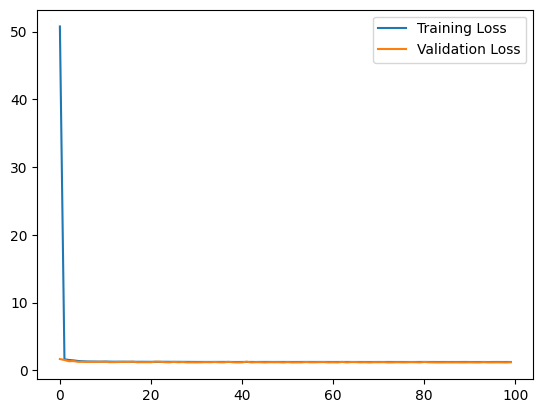

245/245 [==============================] - 0s 2ms/step
Avg F1-Score: 0.3348
Avg AUPRC: 0.3720


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [ ]:
# Separate features and target
X = data.drop(columns=['WEEK'])
y = data['WEEK']


# Prepare target for multitask learning
num_weeks = 4  # Assuming 4 weeks as tasks
y_multitask = np.zeros((X.shape[0], num_weeks))
for i in range(num_weeks):
    y_multitask[:, i] = y == i

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_multitask, test_size=0.2, random_state=42)

# Handle class imbalance
smote = SMOTE()
X_train_res, y_train_res_flat = smote.fit_resample(X_train, y_train.argmax(axis=1))

# Convert y_train_res_flat back to multitask format
y_train_res = np.zeros((X_train_res.shape[0], num_weeks))
for i in range(num_weeks):
    y_train_res[:, i] = (y_train_res_flat == i).astype(int)

# Define the model
def create_multitask_logistic_regression(input_dim, num_tasks):
    inputs = Input(shape=(input_dim,))
    shared_layer = layers.Dense(64, activation='relu')(inputs)
    shared_layer = layers.Dropout(0.5)(shared_layer)
    outputs = [layers.Dense(1, activation='sigmoid', name=f'week_{i+1}')(shared_layer) for i in range(num_tasks)]
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_dim = X.shape[1]
num_tasks = num_weeks

model = create_multitask_logistic_regression(input_dim, num_tasks)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define custom callback for F1 score and AUPRC
class Metrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_pred = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]

        f1_scores = []
        auprcs = []

        for i in range(num_tasks):
            y_true = val_true[:, i]
            y_pred = (val_pred[i] > 0.5).astype(int)
            f1 = f1_score(y_true, y_pred)
            auprc = average_precision_score(y_true, val_pred[i])
            f1_scores.append(f1)
            auprcs.append(auprc)

        avg_f1 = sum(f1_scores) / num_tasks
        avg_auprc = sum(auprcs) / num_tasks

        print(f"Epoch {epoch+1}: Avg F1-Score: {avg_f1:.4f}, Avg AUPRC: {avg_auprc:.4f}")

        logs['val_avg_f1'] = avg_f1
        logs['val_avg_auprc'] = avg_auprc

metrics_callback = Metrics()
metrics_callback.validation_data = (X_val, y_val)

# Fit the model
history = model.fit(
    X_train_res, [y_train_res[:, i] for i in range(num_tasks)],
    epochs=100,
    batch_size=32,
    validation_data=(X_val, [y_val[:, i] for i in range(num_tasks)]),
    callbacks=[metrics_callback],
    verbose=1
)

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Generate predictions
predictions = model.predict(X_val)

# Calculate F1 score and AUPRC for validation set
f1_scores = []
auprcs = []

for i in range(num_tasks):
    y_true = y_val[:, i]
    y_pred = (predictions[i] > 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    auprc = average_precision_score(y_true, predictions[i])
    f1_scores.append(f1)
    auprcs.append(auprc)

avg_f1 = sum(f1_scores) / num_tasks
avg_auprc = sum(auprcs) / num_tasks

print(f"Avg F1-Score: {avg_f1:.4f}")
print(f"Avg AUPRC: {avg_auprc:.4f}")

In [ ]:
avg_f1 = sum(f1_scores) / num_tasks
avg_auprc = sum(auprcs) / num_tasks

print(f"Avg F1-Score: {avg_f1:.4f}")
print(f"Avg AUPRC: {avg_auprc:.4f}")

Avg F1-Score: 0.3348
Avg AUPRC: 0.3720


In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, average_precision_score
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt



# Separate features and target
X = data.drop(columns=['WEEK'])
y = data['WEEK']



# Prepare target for multitask learning
num_weeks = 4  # Assuming 4 weeks as tasks
y_multitask = np.zeros((X.shape[0], num_weeks))
for i in range(num_weeks):
    y_multitask[:, i] = y == i

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_multitask, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTETomek
smote_tomek = SMOTETomek()
X_train_res, y_train_res_flat = smote_tomek.fit_resample(X_train, y_train.argmax(axis=1))

# Convert y_train_res_flat back to multitask format
y_train_res = np.zeros((X_train_res.shape[0], num_weeks))
for i in range(num_weeks):
    y_train_res[:, i] = (y_train_res_flat == i).astype(int)

# Define the model
def create_multitask_logistic_regression(input_dim, num_tasks):
    inputs = Input(shape=(input_dim,))
    shared_layer = layers.Dense(128, activation='relu')(inputs)
    shared_layer = layers.Dropout(0.5)(shared_layer)
    outputs = [layers.Dense(1, activation='sigmoid', name=f'week_{i+1}')(shared_layer) for i in range(num_tasks)]
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_dim = X.shape[1]
num_tasks = num_weeks

model = create_multitask_logistic_regression(input_dim, num_tasks)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define custom callback for F1 score and AUPRC
class Metrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_pred = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]

        f1_scores = []
        auprcs = []

        for i in range(num_tasks):
            y_true = val_true[:, i]
            y_pred = (val_pred[i] > 0.5).astype(int)
            f1 = f1_score(y_true, y_pred)
            auprc = average_precision_score(y_true, val_pred[i])
            f1_scores.append(f1)
            auprcs.append(auprc)

        avg_f1 = sum(f1_scores) / num_tasks
        avg_auprc = sum(auprcs) / num_tasks

        print(f"Epoch {epoch+1}: Avg F1-Score: {avg_f1:.4f}, Avg AUPRC: {avg_auprc:.4f}")

        logs['val_avg_f1'] = avg_f1
        logs['val_avg_auprc'] = avg_auprc

metrics_callback = Metrics()
metrics_callback.validation_data = (X_val, y_val)

# Fit the model
history = model.fit(
    X_train_res, [y_train_res[:, i] for i in range(num_tasks)],
    epochs=100,
    batch_size=32,
    validation_data=(X_val, [y_val[:, i] for i in range(num_tasks)]),
    callbacks=[metrics_callback],
    verbose=1
)





Epoch 1/100
245/245 [==============================] - 1s 2ms/step
Epoch 1: Avg F1-Score: 0.1759, Avg AUPRC: 0.3252
1040/1040 [==============================] - 9s 6ms/step - loss: 33.8386 - week_1_loss: 17.8946 - week_2_loss: 15.2141 - week_3_loss: 0.6244 - week_4_loss: 0.1054 - week_1_accuracy: 0.5106 - week_2_accuracy: 0.5078 - week_3_accuracy: 0.9928 - week_4_accuracy: 0.9981 - val_loss: 1.7425 - val_week_1_loss: 0.8698 - val_week_2_loss: 0.8727 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3252
Epoch 2/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.4979 - week_1_loss: 0.7326 - week_2_loss: 0.7406 - week_3_loss: 0.0248 - week_4_loss: 1.3116e-11 - week_1_accuracy: 0.5294 - week_2_accuracy: 0.5156 - week_3_accuracy: 0.9988 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 2: Avg F1-Score: 0.1759, Avg AUPRC: 0.3573
1040/1040 [==============================] - 4s 4ms/step - loss: 1.4725 - week_1_loss: 0.7316 - week_2_loss: 0.7361 - week_3_loss: 0.0034 - week_4_loss: 0.0014 - week_1_accuracy: 0.5232 - week_2_accuracy: 0.5161 - week_3_accuracy: 0.9996 - week_4_accuracy: 0.9998 - val_loss: 1.5119 - val_week_1_loss: 0.7552 - val_week_2_loss: 0.7567 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3573
Epoch 3/100
  46/1040 [>.............................] - ETA: 3s - loss: 1.5393 - week_1_loss: 0.7683 - week_2_loss: 0.7710 - week_3_loss: 2.9370e-09 - week_4_loss: 1.2733e-15 - week_1_accuracy: 0.5163 - week_2_accuracy: 0.5163 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 3: Avg F1-Score: 0.1872, Avg AUPRC: 0.3467
1040/1040 [==============================] - 6s 5ms/step - loss: 1.4194 - week_1_loss: 0.7076 - week_2_loss: 0.7088 - week_3_loss: 0.0016 - week_4_loss: 0.0014 - week_1_accuracy: 0.5378 - week_2_accuracy: 0.5377 - week_3_accuracy: 0.9998 - week_4_accuracy: 0.9998 - val_loss: 1.3209 - val_week_1_loss: 0.6587 - val_week_2_loss: 0.6622 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5522 - val_week_2_accuracy: 0.5496 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1872 - val_avg_auprc: 0.3467
Epoch 4/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.3852 - week_1_loss: 0.6919 - week_2_loss: 0.6929 - week_3_loss: 5.0536e-04 - week_4_loss: 1.8819e-06 - week_1_accuracy: 0.5477 - week_2_accuracy: 0.5329 - week_3_accuracy: 0.9995 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 4: Avg F1-Score: 0.3121, Avg AUPRC: 0.3652
1040/1040 [==============================] - 5s 4ms/step - loss: 1.3579 - week_1_loss: 0.6784 - week_2_loss: 0.6786 - week_3_loss: 3.9490e-04 - week_4_loss: 4.2640e-04 - week_1_accuracy: 0.5631 - week_2_accuracy: 0.5610 - week_3_accuracy: 0.9998 - week_4_accuracy: 0.9998 - val_loss: 1.2883 - val_week_1_loss: 0.6433 - val_week_2_loss: 0.6450 - val_week_3_loss: 1.4720e-30 - val_week_4_loss: 1.7459e-32 - val_week_1_accuracy: 0.6641 - val_week_2_accuracy: 0.6494 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3121 - val_avg_auprc: 0.3652
Epoch 5/100
  46/1040 [>.............................] - ETA: 3s - loss: 1.3200 - week_1_loss: 0.6595 - week_2_loss: 0.6603 - week_3_loss: 1.9325e-04 - week_4_loss: 2.5744e-07 - week_1_accuracy: 0.5876 - week_2_accuracy: 0.5863 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 5: Avg F1-Score: 0.3348, Avg AUPRC: 0.3654
1040/1040 [==============================] - 5s 4ms/step - loss: 1.3235 - week_1_loss: 0.6618 - week_2_loss: 0.6610 - week_3_loss: 2.2166e-04 - week_4_loss: 4.0293e-04 - week_1_accuracy: 0.5903 - week_2_accuracy: 0.5949 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9998 - val_loss: 1.2446 - val_week_1_loss: 0.6241 - val_week_2_loss: 0.6205 - val_week_3_loss: 3.9369e-08 - val_week_4_loss: 6.7775e-10 - val_week_1_accuracy: 0.6722 - val_week_2_accuracy: 0.6725 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3348 - val_avg_auprc: 0.3654
Epoch 6/100
  34/1040 [..............................] - ETA: 4s - loss: 1.3263 - week_1_loss: 0.6619 - week_2_loss: 0.6631 - week_3_loss: 8.3479e-04 - week_4_loss: 5.4536e-04 - week_1_accuracy: 0.5901 - week_2_accuracy: 0.5882 - week_3_accuracy: 0.9991 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 6: Avg F1-Score: 0.2130, Avg AUPRC: 0.3562
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2979 - week_1_loss: 0.6485 - week_2_loss: 0.6482 - week_3_loss: 5.8741e-04 - week_4_loss: 6.0222e-04 - week_1_accuracy: 0.6133 - week_2_accuracy: 0.6145 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.3640 - val_week_1_loss: 0.6816 - val_week_2_loss: 0.6823 - val_week_3_loss: 3.5886e-05 - val_week_4_loss: 1.7612e-05 - val_week_1_accuracy: 0.5149 - val_week_2_accuracy: 0.5143 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2130 - val_avg_auprc: 0.3562
Epoch 7/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2753 - week_1_loss: 0.6369 - week_2_loss: 0.6368 - week_3_loss: 9.3167e-04 - week_4_loss: 6.2097e-04 - week_1_accuracy: 0.6256 - week_2_accuracy: 0.6285 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 7: Avg F1-Score: 0.3473, Avg AUPRC: 0.3757
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2957 - week_1_loss: 0.6470 - week_2_loss: 0.6469 - week_3_loss: 0.0010 - week_4_loss: 7.4268e-04 - week_1_accuracy: 0.6141 - week_2_accuracy: 0.6139 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2425 - val_week_1_loss: 0.6208 - val_week_2_loss: 0.6217 - val_week_3_loss: 3.7934e-08 - val_week_4_loss: 2.4459e-08 - val_week_1_accuracy: 0.6938 - val_week_2_accuracy: 0.6947 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3473 - val_avg_auprc: 0.3757
Epoch 8/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.3197 - week_1_loss: 0.6579 - week_2_loss: 0.6588 - week_3_loss: 0.0017 - week_4_loss: 0.0014 - week_1_accuracy: 0.5842 - week_2_accuracy: 0.5781 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 8: Avg F1-Score: 0.3427, Avg AUPRC: 0.3726
1040/1040 [==============================] - 7s 6ms/step - loss: 1.3006 - week_1_loss: 0.6481 - week_2_loss: 0.6481 - week_3_loss: 0.0024 - week_4_loss: 0.0019 - week_1_accuracy: 0.6103 - week_2_accuracy: 0.6097 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2159 - val_week_1_loss: 0.6078 - val_week_2_loss: 0.6080 - val_week_3_loss: 1.8814e-05 - val_week_4_loss: 1.1108e-05 - val_week_1_accuracy: 0.6865 - val_week_2_accuracy: 0.6854 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3427 - val_avg_auprc: 0.3726
Epoch 9/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2628 - week_1_loss: 0.6290 - week_2_loss: 0.6290 - week_3_loss: 0.0027 - week_4_loss: 0.0021 - week_1_accuracy: 0.6387 - week_2_accuracy: 0.6382 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 9: Avg F1-Score: 0.3421, Avg AUPRC: 0.3761
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2856 - week_1_loss: 0.6397 - week_2_loss: 0.6397 - week_3_loss: 0.0035 - week_4_loss: 0.0027 - week_1_accuracy: 0.6272 - week_2_accuracy: 0.6270 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2102 - val_week_1_loss: 0.6052 - val_week_2_loss: 0.6050 - val_week_3_loss: 1.2422e-05 - val_week_4_loss: 2.8253e-06 - val_week_1_accuracy: 0.6851 - val_week_2_accuracy: 0.6849 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3421 - val_avg_auprc: 0.3761
Epoch 10/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2820 - week_1_loss: 0.6372 - week_2_loss: 0.6372 - week_3_loss: 0.0043 - week_4_loss: 0.0034 - week_1_accuracy: 0.6432 - week_2_accuracy: 0.6443 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 10: Avg F1-Score: 0.3370, Avg AUPRC: 0.3767
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2882 - week_1_loss: 0.6409 - week_2_loss: 0.6409 - week_3_loss: 0.0035 - week_4_loss: 0.0028 - week_1_accuracy: 0.6249 - week_2_accuracy: 0.6250 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1805 - val_week_1_loss: 0.5903 - val_week_2_loss: 0.5902 - val_week_3_loss: 1.7600e-06 - val_week_4_loss: 2.5294e-07 - val_week_1_accuracy: 0.6850 - val_week_2_accuracy: 0.6850 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3370 - val_avg_auprc: 0.3767
Epoch 11/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.3023 - week_1_loss: 0.6481 - week_2_loss: 0.6481 - week_3_loss: 0.0033 - week_4_loss: 0.0027 - week_1_accuracy: 0.6309 - week_2_accuracy: 0.6315 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 11: Avg F1-Score: 0.3396, Avg AUPRC: 0.3658
1040/1040 [==============================] - 7s 7ms/step - loss: 1.2783 - week_1_loss: 0.6341 - week_2_loss: 0.6340 - week_3_loss: 0.0055 - week_4_loss: 0.0047 - week_1_accuracy: 0.6462 - week_2_accuracy: 0.6462 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2046 - val_week_1_loss: 0.6018 - val_week_2_loss: 0.6018 - val_week_3_loss: 6.7477e-04 - val_week_4_loss: 4.2435e-04 - val_week_1_accuracy: 0.6818 - val_week_2_accuracy: 0.6817 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3396 - val_avg_auprc: 0.3658
Epoch 12/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2971 - week_1_loss: 0.6452 - week_2_loss: 0.6452 - week_3_loss: 0.0037 - week_4_loss: 0.0031 - week_1_accuracy: 0.6314 - week_2_accuracy: 0.6314 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 12: Avg F1-Score: 0.3191, Avg AUPRC: 0.3632
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2715 - week_1_loss: 0.6331 - week_2_loss: 0.6331 - week_3_loss: 0.0029 - week_4_loss: 0.0024 - week_1_accuracy: 0.6452 - week_2_accuracy: 0.6451 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2338 - val_week_1_loss: 0.6136 - val_week_2_loss: 0.6136 - val_week_3_loss: 0.0036 - val_week_4_loss: 0.0030 - val_week_1_accuracy: 0.6492 - val_week_2_accuracy: 0.6492 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3191 - val_avg_auprc: 0.3632
Epoch 13/100
  52/1040 [>.............................] - ETA: 3s - loss: 1.2837 - week_1_loss: 0.6388 - week_2_loss: 0.6389 - week_3_loss: 0.0033 - week_4_loss: 0.0028 - week_1_accuracy: 0.6280 - week_2_accuracy: 0.6280 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 13: Avg F1-Score: 0.3292, Avg AUPRC: 0.3658
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2668 - week_1_loss: 0.6312 - week_2_loss: 0.6312 - week_3_loss: 0.0024 - week_4_loss: 0.0020 - week_1_accuracy: 0.6446 - week_2_accuracy: 0.6445 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2268 - val_week_1_loss: 0.6120 - val_week_2_loss: 0.6120 - val_week_3_loss: 0.0015 - val_week_4_loss: 0.0012 - val_week_1_accuracy: 0.6644 - val_week_2_accuracy: 0.6641 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3292 - val_avg_auprc: 0.3658
Epoch 14/100
  35/1040 [>.............................] - ETA: 4s - loss: 1.2577 - week_1_loss: 0.6273 - week_2_loss: 0.6273 - week_3_loss: 0.0017 - week_4_loss: 0.0014 - week_1_accuracy: 0.6554 - week_2_accuracy: 0.6554 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 14: Avg F1-Score: 0.3033, Avg AUPRC: 0.3771
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2588 - week_1_loss: 0.6283 - week_2_loss: 0.6283 - week_3_loss: 0.0012 - week_4_loss: 0.0010 - week_1_accuracy: 0.6510 - week_2_accuracy: 0.6509 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2439 - val_week_1_loss: 0.6214 - val_week_2_loss: 0.6214 - val_week_3_loss: 6.2458e-04 - val_week_4_loss: 4.3917e-04 - val_week_1_accuracy: 0.6256 - val_week_2_accuracy: 0.6256 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3033 - val_avg_auprc: 0.3771
Epoch 15/100
  41/1040 [>.............................] - ETA: 3s - loss: 1.2662 - week_1_loss: 0.6322 - week_2_loss: 0.6322 - week_3_loss: 9.9343e-04 - week_4_loss: 8.7256e-04 - week_1_accuracy: 0.6387 - week_2_accuracy: 0.6387 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 15: Avg F1-Score: 0.3222, Avg AUPRC: 0.3569
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2540 - week_1_loss: 0.6263 - week_2_loss: 0.6263 - week_3_loss: 7.3021e-04 - week_4_loss: 6.2018e-04 - week_1_accuracy: 0.6556 - week_2_accuracy: 0.6556 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2238 - val_week_1_loss: 0.6113 - val_week_2_loss: 0.6113 - val_week_3_loss: 6.3510e-04 - val_week_4_loss: 5.3927e-04 - val_week_1_accuracy: 0.6537 - val_week_2_accuracy: 0.6537 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3222 - val_avg_auprc: 0.3569
Epoch 16/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2721 - week_1_loss: 0.6355 - week_2_loss: 0.6355 - week_3_loss: 5.9633e-04 - week_4_loss: 5.0707e-04 - week_1_accuracy: 0.6345 - week_2_accuracy: 0.6345 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 16: Avg F1-Score: 0.3504, Avg AUPRC: 0.3798
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2539 - week_1_loss: 0.6265 - week_2_loss: 0.6265 - week_3_loss: 4.7550e-04 - week_4_loss: 3.9785e-04 - week_1_accuracy: 0.6512 - week_2_accuracy: 0.6512 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1810 - val_week_1_loss: 0.5903 - val_week_2_loss: 0.5903 - val_week_3_loss: 1.5974e-04 - val_week_4_loss: 1.0435e-04 - val_week_1_accuracy: 0.7020 - val_week_2_accuracy: 0.7020 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3504 - val_avg_auprc: 0.3798
Epoch 17/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2287 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 3.6233e-04 - week_4_loss: 3.0050e-04 - week_1_accuracy: 0.6706 - week_2_accuracy: 0.6706 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 17: Avg F1-Score: 0.3244, Avg AUPRC: 0.3703
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2534 - week_1_loss: 0.6264 - week_2_loss: 0.6264 - week_3_loss: 2.9931e-04 - week_4_loss: 2.4789e-04 - week_1_accuracy: 0.6552 - week_2_accuracy: 0.6552 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2123 - val_week_1_loss: 0.6060 - val_week_2_loss: 0.6060 - val_week_3_loss: 2.2029e-04 - val_week_4_loss: 1.6983e-04 - val_week_1_accuracy: 0.6565 - val_week_2_accuracy: 0.6565 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3244 - val_avg_auprc: 0.3703
Epoch 18/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2347 - week_1_loss: 0.6171 - week_2_loss: 0.6171 - week_3_loss: 2.1544e-04 - week_4_loss: 1.7514e-04 - week_1_accuracy: 0.6607 - week_2_accuracy: 0.6607 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 18: Avg F1-Score: 0.3502, Avg AUPRC: 0.3774
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2508 - week_1_loss: 0.6252 - week_2_loss: 0.6252 - week_3_loss: 1.9319e-04 - week_4_loss: 1.5913e-04 - week_1_accuracy: 0.6532 - week_2_accuracy: 0.6532 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1776 - val_week_1_loss: 0.5887 - val_week_2_loss: 0.5887 - val_week_3_loss: 7.7983e-05 - val_week_4_loss: 5.6236e-05 - val_week_1_accuracy: 0.7004 - val_week_2_accuracy: 0.7004 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3502 - val_avg_auprc: 0.3774
Epoch 19/100
  46/1040 [>.............................] - ETA: 3s - loss: 1.2638 - week_1_loss: 0.6317 - week_2_loss: 0.6317 - week_3_loss: 1.6067e-04 - week_4_loss: 1.3331e-04 - week_1_accuracy: 0.6515 - week_2_accuracy: 0.6515 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 19: Avg F1-Score: 0.3271, Avg AUPRC: 0.3790
1040/1040 [==============================] - 7s 6ms/step - loss: 1.2506 - week_1_loss: 0.6252 - week_2_loss: 0.6252 - week_3_loss: 1.2406e-04 - week_4_loss: 1.0202e-04 - week_1_accuracy: 0.6564 - week_2_accuracy: 0.6564 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2226 - val_week_1_loss: 0.6113 - val_week_2_loss: 0.6113 - val_week_3_loss: 4.3457e-05 - val_week_4_loss: 2.8117e-05 - val_week_1_accuracy: 0.6609 - val_week_2_accuracy: 0.6609 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3271 - val_avg_auprc: 0.3790
Epoch 20/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2532 - week_1_loss: 0.6265 - week_2_loss: 0.6265 - week_3_loss: 9.4503e-05 - week_4_loss: 7.8280e-05 - week_1_accuracy: 0.6486 - week_2_accuracy: 0.6486 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 20: Avg F1-Score: 0.3168, Avg AUPRC: 0.3623
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2476 - week_1_loss: 0.6237 - week_2_loss: 0.6237 - week_3_loss: 8.1643e-05 - week_4_loss: 6.7189e-05 - week_1_accuracy: 0.6564 - week_2_accuracy: 0.6564 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2267 - val_week_1_loss: 0.6133 - val_week_2_loss: 0.6133 - val_week_3_loss: 7.2478e-05 - val_week_4_loss: 5.9371e-05 - val_week_1_accuracy: 0.6450 - val_week_2_accuracy: 0.6450 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3168 - val_avg_auprc: 0.3623
Epoch 21/100
  40/1040 [>.............................] - ETA: 3s - loss: 1.2356 - week_1_loss: 0.6178 - week_2_loss: 0.6178 - week_3_loss: 5.5939e-05 - week_4_loss: 4.5248e-05 - week_1_accuracy: 0.6883 - week_2_accuracy: 0.6883 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 21: Avg F1-Score: 0.3496, Avg AUPRC: 0.3703
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2572 - week_1_loss: 0.6285 - week_2_loss: 0.6285 - week_3_loss: 5.5059e-05 - week_4_loss: 4.5326e-05 - week_1_accuracy: 0.6516 - week_2_accuracy: 0.6516 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1716 - val_week_1_loss: 0.5858 - val_week_2_loss: 0.5858 - val_week_3_loss: 3.2578e-05 - val_week_4_loss: 2.6240e-05 - val_week_1_accuracy: 0.6992 - val_week_2_accuracy: 0.6992 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3496 - val_avg_auprc: 0.3703
Epoch 22/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2684 - week_1_loss: 0.6342 - week_2_loss: 0.6342 - week_3_loss: 4.4465e-05 - week_4_loss: 3.6556e-05 - week_1_accuracy: 0.6497 - week_2_accuracy: 0.6497 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 22: Avg F1-Score: 0.3413, Avg AUPRC: 0.3742
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2462 - week_1_loss: 0.6231 - week_2_loss: 0.6231 - week_3_loss: 3.4069e-05 - week_4_loss: 2.8027e-05 - week_1_accuracy: 0.6589 - week_2_accuracy: 0.6589 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1900 - val_week_1_loss: 0.5950 - val_week_2_loss: 0.5950 - val_week_3_loss: 2.0459e-05 - val_week_4_loss: 1.5399e-05 - val_week_1_accuracy: 0.6845 - val_week_2_accuracy: 0.6845 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3413 - val_avg_auprc: 0.3742
Epoch 23/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2332 - week_1_loss: 0.6166 - week_2_loss: 0.6166 - week_3_loss: 2.8593e-05 - week_4_loss: 2.3634e-05 - week_1_accuracy: 0.6693 - week_2_accuracy: 0.6693 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 23: Avg F1-Score: 0.3432, Avg AUPRC: 0.3748
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2504 - week_1_loss: 0.6252 - week_2_loss: 0.6252 - week_3_loss: 2.2607e-05 - week_4_loss: 1.8644e-05 - week_1_accuracy: 0.6546 - week_2_accuracy: 0.6546 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1916 - val_week_1_loss: 0.5958 - val_week_2_loss: 0.5958 - val_week_3_loss: 1.1295e-05 - val_week_4_loss: 8.6571e-06 - val_week_1_accuracy: 0.6881 - val_week_2_accuracy: 0.6881 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3432 - val_avg_auprc: 0.3748
Epoch 24/100
  32/1040 [..............................] - ETA: 5s - loss: 1.2467 - week_1_loss: 0.6234 - week_2_loss: 0.6234 - week_3_loss: 1.6463e-05 - week_4_loss: 1.3491e-05 - week_1_accuracy: 0.6523 - week_2_accuracy: 0.6523 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 24: Avg F1-Score: 0.2944, Avg AUPRC: 0.3572
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2510 - week_1_loss: 0.6255 - week_2_loss: 0.6255 - week_3_loss: 1.4637e-05 - week_4_loss: 1.2067e-05 - week_1_accuracy: 0.6558 - week_2_accuracy: 0.6558 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2681 - val_week_1_loss: 0.6340 - val_week_2_loss: 0.6340 - val_week_3_loss: 1.4738e-05 - val_week_4_loss: 1.1992e-05 - val_week_1_accuracy: 0.6130 - val_week_2_accuracy: 0.6130 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2944 - val_avg_auprc: 0.3572
Epoch 25/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2424 - week_1_loss: 0.6212 - week_2_loss: 0.6212 - week_3_loss: 1.2344e-05 - week_4_loss: 1.0306e-05 - week_1_accuracy: 0.6530 - week_2_accuracy: 0.6530 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 25: Avg F1-Score: 0.3516, Avg AUPRC: 0.3724
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2449 - week_1_loss: 0.6224 - week_2_loss: 0.6224 - week_3_loss: 9.7382e-06 - week_4_loss: 8.0568e-06 - week_1_accuracy: 0.6571 - week_2_accuracy: 0.6571 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1689 - val_week_1_loss: 0.5845 - val_week_2_loss: 0.5845 - val_week_3_loss: 5.1191e-06 - val_week_4_loss: 4.1080e-06 - val_week_1_accuracy: 0.7032 - val_week_2_accuracy: 0.7032 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3516 - val_avg_auprc: 0.3724
Epoch 26/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2736 - week_1_loss: 0.6368 - week_2_loss: 0.6368 - week_3_loss: 6.8297e-06 - week_4_loss: 5.6152e-06 - week_1_accuracy: 0.6431 - week_2_accuracy: 0.6431 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 26: Avg F1-Score: 0.3510, Avg AUPRC: 0.3757
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2486 - week_1_loss: 0.6243 - week_2_loss: 0.6243 - week_3_loss: 6.1970e-06 - week_4_loss: 5.1156e-06 - week_1_accuracy: 0.6560 - week_2_accuracy: 0.6560 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1660 - val_week_1_loss: 0.5830 - val_week_2_loss: 0.5830 - val_week_3_loss: 2.5605e-06 - val_week_4_loss: 2.0091e-06 - val_week_1_accuracy: 0.7029 - val_week_2_accuracy: 0.7029 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3510 - val_avg_auprc: 0.3757
Epoch 27/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2273 - week_1_loss: 0.6137 - week_2_loss: 0.6137 - week_3_loss: 4.0798e-06 - week_4_loss: 3.3474e-06 - week_1_accuracy: 0.6736 - week_2_accuracy: 0.6736 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 27: Avg F1-Score: 0.3473, Avg AUPRC: 0.3788
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2500 - week_1_loss: 0.6250 - week_2_loss: 0.6250 - week_3_loss: 4.1031e-06 - week_4_loss: 3.3948e-06 - week_1_accuracy: 0.6578 - week_2_accuracy: 0.6578 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1816 - val_week_1_loss: 0.5908 - val_week_2_loss: 0.5908 - val_week_3_loss: 1.2814e-06 - val_week_4_loss: 9.3404e-07 - val_week_1_accuracy: 0.6953 - val_week_2_accuracy: 0.6953 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3473 - val_avg_auprc: 0.3788
Epoch 28/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2483 - week_1_loss: 0.6242 - week_2_loss: 0.6242 - week_3_loss: 3.2014e-06 - week_4_loss: 2.6483e-06 - week_1_accuracy: 0.6837 - week_2_accuracy: 0.6837 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 28: Avg F1-Score: 0.3251, Avg AUPRC: 0.3757
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2495 - week_1_loss: 0.6248 - week_2_loss: 0.6248 - week_3_loss: 2.7048e-06 - week_4_loss: 2.2458e-06 - week_1_accuracy: 0.6591 - week_2_accuracy: 0.6591 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2136 - val_week_1_loss: 0.6068 - val_week_2_loss: 0.6068 - val_week_3_loss: 1.3877e-06 - val_week_4_loss: 1.0055e-06 - val_week_1_accuracy: 0.6575 - val_week_2_accuracy: 0.6575 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3251 - val_avg_auprc: 0.3757
Epoch 29/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2748 - week_1_loss: 0.6374 - week_2_loss: 0.6374 - week_3_loss: 2.2768e-06 - week_4_loss: 1.8938e-06 - week_1_accuracy: 0.6500 - week_2_accuracy: 0.6500 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 29: Avg F1-Score: 0.3015, Avg AUPRC: 0.3629
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2459 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 1.7185e-06 - week_4_loss: 1.4271e-06 - week_1_accuracy: 0.6613 - week_2_accuracy: 0.6613 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2501 - val_week_1_loss: 0.6251 - val_week_2_loss: 0.6251 - val_week_3_loss: 1.5611e-06 - val_week_4_loss: 1.2938e-06 - val_week_1_accuracy: 0.6233 - val_week_2_accuracy: 0.6233 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3015 - val_avg_auprc: 0.3629
Epoch 30/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2196 - week_1_loss: 0.6098 - week_2_loss: 0.6098 - week_3_loss: 1.5668e-06 - week_4_loss: 1.3070e-06 - week_1_accuracy: 0.6727 - week_2_accuracy: 0.6727 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 30: Avg F1-Score: 0.3446, Avg AUPRC: 0.3692
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2433 - week_1_loss: 0.6217 - week_2_loss: 0.6217 - week_3_loss: 1.1807e-06 - week_4_loss: 9.8389e-07 - week_1_accuracy: 0.6619 - week_2_accuracy: 0.6619 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1846 - val_week_1_loss: 0.5923 - val_week_2_loss: 0.5923 - val_week_3_loss: 7.8784e-07 - val_week_4_loss: 6.5035e-07 - val_week_1_accuracy: 0.6905 - val_week_2_accuracy: 0.6905 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3446 - val_avg_auprc: 0.3692
Epoch 31/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2453 - week_1_loss: 0.6226 - week_2_loss: 0.6226 - week_3_loss: 9.2346e-07 - week_4_loss: 7.6473e-07 - week_1_accuracy: 0.6636 - week_2_accuracy: 0.6636 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 31: Avg F1-Score: 0.3485, Avg AUPRC: 0.3733
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2423 - week_1_loss: 0.6212 - week_2_loss: 0.6212 - week_3_loss: 7.4643e-07 - week_4_loss: 6.2241e-07 - week_1_accuracy: 0.6627 - week_2_accuracy: 0.6627 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1722 - val_week_1_loss: 0.5861 - val_week_2_loss: 0.5861 - val_week_3_loss: 4.2954e-07 - val_week_4_loss: 3.4660e-07 - val_week_1_accuracy: 0.6973 - val_week_2_accuracy: 0.6973 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3485 - val_avg_auprc: 0.3733
Epoch 32/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2061 - week_1_loss: 0.6030 - week_2_loss: 0.6030 - week_3_loss: 5.6452e-07 - week_4_loss: 4.7065e-07 - week_1_accuracy: 0.6833 - week_2_accuracy: 0.6833 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 32: Avg F1-Score: 0.3280, Avg AUPRC: 0.3760
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2466 - week_1_loss: 0.6233 - week_2_loss: 0.6233 - week_3_loss: 5.1562e-07 - week_4_loss: 4.3265e-07 - week_1_accuracy: 0.6609 - week_2_accuracy: 0.6609 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1999 - val_week_1_loss: 0.6000 - val_week_2_loss: 0.6000 - val_week_3_loss: 2.4521e-07 - val_week_4_loss: 1.8027e-07 - val_week_1_accuracy: 0.6624 - val_week_2_accuracy: 0.6624 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3280 - val_avg_auprc: 0.3760
Epoch 33/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2667 - week_1_loss: 0.6334 - week_2_loss: 0.6334 - week_3_loss: 4.4909e-07 - week_4_loss: 3.7911e-07 - week_1_accuracy: 0.6472 - week_2_accuracy: 0.6472 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 33: Avg F1-Score: 0.3496, Avg AUPRC: 0.3809
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2492 - week_1_loss: 0.6246 - week_2_loss: 0.6246 - week_3_loss: 3.4519e-07 - week_4_loss: 2.9122e-07 - week_1_accuracy: 0.6588 - week_2_accuracy: 0.6588 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1853 - val_week_1_loss: 0.5927 - val_week_2_loss: 0.5927 - val_week_3_loss: 2.0325e-08 - val_week_4_loss: 1.1673e-08 - val_week_1_accuracy: 0.6993 - val_week_2_accuracy: 0.6993 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3496 - val_avg_auprc: 0.3809
Epoch 34/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2561 - week_1_loss: 0.6281 - week_2_loss: 0.6281 - week_3_loss: 2.4395e-07 - week_4_loss: 2.0561e-07 - week_1_accuracy: 0.6569 - week_2_accuracy: 0.6569 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 34: Avg F1-Score: 0.3508, Avg AUPRC: 0.3759
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2461 - week_1_loss: 0.6231 - week_2_loss: 0.6231 - week_3_loss: 2.1898e-07 - week_4_loss: 1.8539e-07 - week_1_accuracy: 0.6611 - week_2_accuracy: 0.6611 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1621 - val_week_1_loss: 0.5810 - val_week_2_loss: 0.5810 - val_week_3_loss: 9.4184e-08 - val_week_4_loss: 7.6493e-08 - val_week_1_accuracy: 0.7022 - val_week_2_accuracy: 0.7022 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3508 - val_avg_auprc: 0.3759
Epoch 35/100
  24/1040 [..............................] - ETA: 4s - loss: 1.2019 - week_1_loss: 0.6009 - week_2_loss: 0.6009 - week_3_loss: 1.7977e-07 - week_4_loss: 1.5369e-07 - week_1_accuracy: 0.7096 - week_2_accuracy: 0.7096 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 35: Avg F1-Score: 0.3364, Avg AUPRC: 0.3667
1040/1040 [==============================] - 10s 9ms/step - loss: 1.2432 - week_1_loss: 0.6216 - week_2_loss: 0.6216 - week_3_loss: 1.5728e-07 - week_4_loss: 1.3458e-07 - week_1_accuracy: 0.6616 - week_2_accuracy: 0.6615 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1993 - val_week_1_loss: 0.5997 - val_week_2_loss: 0.5997 - val_week_3_loss: 1.2523e-07 - val_week_4_loss: 1.0621e-07 - val_week_1_accuracy: 0.6766 - val_week_2_accuracy: 0.6766 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3364 - val_avg_auprc: 0.3667
Epoch 36/100
  14/1040 [..............................] - ETA: 8s - loss: 1.1940 - week_1_loss: 0.5970 - week_2_loss: 0.5970 - week_3_loss: 1.2946e-07 - week_4_loss: 1.1212e-07 - week_1_accuracy: 0.6920 - week_2_accuracy: 0.6920 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 2s 6ms/step
Epoch 36: Avg F1-Score: 0.3419, Avg AUPRC: 0.3690
1040/1040 [==============================] - 10s 10ms/step - loss: 1.2443 - week_1_loss: 0.6221 - week_2_loss: 0.6221 - week_3_loss: 1.0817e-07 - week_4_loss: 9.3601e-08 - week_1_accuracy: 0.6603 - week_2_accuracy: 0.6603 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1857 - val_week_1_loss: 0.5929 - val_week_2_loss: 0.5929 - val_week_3_loss: 7.9879e-08 - val_week_4_loss: 6.8741e-08 - val_week_1_accuracy: 0.6858 - val_week_2_accuracy: 0.6858 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3419 - val_avg_auprc: 0.3690
Epoch 37/100
  18/1040 [..............................] - ETA: 6s - loss: 1.2820 - week_1_loss: 0.6410 - week_2_loss: 0.6410 - week_3_loss: 9.6731e-08 - week_4_loss: 8.4238e-08 - week_1_accuracy: 0.6354 - week_2_accuracy: 0.6354 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 2s 7ms/step
Epoch 37: Avg F1-Score: 0.3350, Avg AUPRC: 0.3645
1040/1040 [==============================] - 13s 12ms/step - loss: 1.2502 - week_1_loss: 0.6251 - week_2_loss: 0.6251 - week_3_loss: 8.1707e-08 - week_4_loss: 7.1574e-08 - week_1_accuracy: 0.6559 - week_2_accuracy: 0.6559 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2017 - val_week_1_loss: 0.6008 - val_week_2_loss: 0.6008 - val_week_3_loss: 6.6228e-08 - val_week_4_loss: 5.8324e-08 - val_week_1_accuracy: 0.6740 - val_week_2_accuracy: 0.6740 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3350 - val_avg_auprc: 0.3645
Epoch 38/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2533 - week_1_loss: 0.6266 - week_2_loss: 0.6266 - week_3_loss: 6.3368e-08 - week_4_loss: 5.5717e-08 - week_1_accuracy: 0.6535 - week_2_accuracy: 0.6535 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 38: Avg F1-Score: 0.3491, Avg AUPRC: 0.3793
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2484 - week_1_loss: 0.6242 - week_2_loss: 0.6242 - week_3_loss: 5.6883e-08 - week_4_loss: 5.0404e-08 - week_1_accuracy: 0.6593 - week_2_accuracy: 0.6593 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1812 - val_week_1_loss: 0.5906 - val_week_2_loss: 0.5906 - val_week_3_loss: 1.6295e-08 - val_week_4_loss: 1.2532e-08 - val_week_1_accuracy: 0.6983 - val_week_2_accuracy: 0.6983 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3491 - val_avg_auprc: 0.3793
Epoch 39/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2529 - week_1_loss: 0.6264 - week_2_loss: 0.6264 - week_3_loss: 4.9184e-08 - week_4_loss: 4.3976e-08 - week_1_accuracy: 0.6574 - week_2_accuracy: 0.6574 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 39: Avg F1-Score: 0.3078, Avg AUPRC: 0.3648
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2461 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 4.2592e-08 - week_4_loss: 3.8260e-08 - week_1_accuracy: 0.6604 - week_2_accuracy: 0.6604 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2411 - val_week_1_loss: 0.6206 - val_week_2_loss: 0.6206 - val_week_3_loss: 3.9410e-08 - val_week_4_loss: 3.5386e-08 - val_week_1_accuracy: 0.6319 - val_week_2_accuracy: 0.6319 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3078 - val_avg_auprc: 0.3648
Epoch 40/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2771 - week_1_loss: 0.6385 - week_2_loss: 0.6385 - week_3_loss: 4.0732e-08 - week_4_loss: 3.6868e-08 - week_1_accuracy: 0.6509 - week_2_accuracy: 0.6509 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 40: Avg F1-Score: 0.3492, Avg AUPRC: 0.3770
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2476 - week_1_loss: 0.6238 - week_2_loss: 0.6238 - week_3_loss: 3.4019e-08 - week_4_loss: 3.0962e-08 - week_1_accuracy: 0.6599 - week_2_accuracy: 0.6599 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1701 - val_week_1_loss: 0.5850 - val_week_2_loss: 0.5850 - val_week_3_loss: 1.3341e-08 - val_week_4_loss: 1.1479e-08 - val_week_1_accuracy: 0.6985 - val_week_2_accuracy: 0.6985 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3492 - val_avg_auprc: 0.3770
Epoch 41/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2908 - week_1_loss: 0.6454 - week_2_loss: 0.6454 - week_3_loss: 3.5799e-08 - week_4_loss: 3.2870e-08 - week_1_accuracy: 0.6261 - week_2_accuracy: 0.6261 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 41: Avg F1-Score: 0.3407, Avg AUPRC: 0.3668
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2430 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 2.7955e-08 - week_4_loss: 2.5739e-08 - week_1_accuracy: 0.6630 - week_2_accuracy: 0.6630 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1894 - val_week_1_loss: 0.5947 - val_week_2_loss: 0.5947 - val_week_3_loss: 2.3055e-08 - val_week_4_loss: 2.1199e-08 - val_week_1_accuracy: 0.6836 - val_week_2_accuracy: 0.6836 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3407 - val_avg_auprc: 0.3668
Epoch 42/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2369 - week_1_loss: 0.6185 - week_2_loss: 0.6185 - week_3_loss: 2.3921e-08 - week_4_loss: 2.2153e-08 - week_1_accuracy: 0.6734 - week_2_accuracy: 0.6734 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 42: Avg F1-Score: 0.3124, Avg AUPRC: 0.3634
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2408 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 2.1990e-08 - week_4_loss: 2.0439e-08 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2344 - val_week_1_loss: 0.6172 - val_week_2_loss: 0.6172 - val_week_3_loss: 2.2017e-08 - val_week_4_loss: 2.0415e-08 - val_week_1_accuracy: 0.6380 - val_week_2_accuracy: 0.6380 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3124 - val_avg_auprc: 0.3634
Epoch 43/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2516 - week_1_loss: 0.6258 - week_2_loss: 0.6258 - week_3_loss: 2.2045e-08 - week_4_loss: 2.0615e-08 - week_1_accuracy: 0.6434 - week_2_accuracy: 0.6434 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 43: Avg F1-Score: 0.3506, Avg AUPRC: 0.3792
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2435 - week_1_loss: 0.6217 - week_2_loss: 0.6217 - week_3_loss: 1.9661e-08 - week_4_loss: 1.8442e-08 - week_1_accuracy: 0.6601 - week_2_accuracy: 0.6601 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1759 - val_week_1_loss: 0.5879 - val_week_2_loss: 0.5879 - val_week_3_loss: 5.8742e-09 - val_week_4_loss: 5.2557e-09 - val_week_1_accuracy: 0.7013 - val_week_2_accuracy: 0.7013 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3506 - val_avg_auprc: 0.3792
Epoch 44/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2681 - week_1_loss: 0.6340 - week_2_loss: 0.6340 - week_3_loss: 1.7656e-08 - week_4_loss: 1.6666e-08 - week_1_accuracy: 0.6588 - week_2_accuracy: 0.6588 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 44: Avg F1-Score: 0.3447, Avg AUPRC: 0.3808
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2455 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 1.6210e-08 - week_4_loss: 1.5307e-08 - week_1_accuracy: 0.6611 - week_2_accuracy: 0.6611 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1685 - val_week_1_loss: 0.5842 - val_week_2_loss: 0.5842 - val_week_3_loss: 2.0726e-09 - val_week_4_loss: 1.6811e-09 - val_week_1_accuracy: 0.6972 - val_week_2_accuracy: 0.6972 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3447 - val_avg_auprc: 0.3808
Epoch 45/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2516 - week_1_loss: 0.6258 - week_2_loss: 0.6258 - week_3_loss: 1.2598e-08 - week_4_loss: 1.1914e-08 - week_1_accuracy: 0.6518 - week_2_accuracy: 0.6518 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 45: Avg F1-Score: 0.3218, Avg AUPRC: 0.3606
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2444 - week_1_loss: 0.6222 - week_2_loss: 0.6222 - week_3_loss: 1.4028e-08 - week_4_loss: 1.3324e-08 - week_1_accuracy: 0.6628 - week_2_accuracy: 0.6628 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2136 - val_week_1_loss: 0.6068 - val_week_2_loss: 0.6068 - val_week_3_loss: 1.4797e-08 - val_week_4_loss: 1.4084e-08 - val_week_1_accuracy: 0.6524 - val_week_2_accuracy: 0.6524 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3218 - val_avg_auprc: 0.3606
Epoch 46/100
  35/1040 [>.............................] - ETA: 4s - loss: 1.2591 - week_1_loss: 0.6295 - week_2_loss: 0.6295 - week_3_loss: 1.3947e-08 - week_4_loss: 1.3320e-08 - week_1_accuracy: 0.6545 - week_2_accuracy: 0.6545 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 46: Avg F1-Score: 0.3525, Avg AUPRC: 0.3785
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2432 - week_1_loss: 0.6216 - week_2_loss: 0.6216 - week_3_loss: 1.2767e-08 - week_4_loss: 1.2191e-08 - week_1_accuracy: 0.6628 - week_2_accuracy: 0.6628 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1694 - val_week_1_loss: 0.5847 - val_week_2_loss: 0.5847 - val_week_3_loss: 3.7242e-09 - val_week_4_loss: 3.4405e-09 - val_week_1_accuracy: 0.7054 - val_week_2_accuracy: 0.7054 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3525 - val_avg_auprc: 0.3785
Epoch 47/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.2457 - week_1_loss: 0.6228 - week_2_loss: 0.6228 - week_3_loss: 1.2125e-08 - week_4_loss: 1.1607e-08 - week_1_accuracy: 0.6671 - week_2_accuracy: 0.6671 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 47: Avg F1-Score: 0.3412, Avg AUPRC: 0.3699
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2449 - week_1_loss: 0.6224 - week_2_loss: 0.6224 - week_3_loss: 1.1294e-08 - week_4_loss: 1.0826e-08 - week_1_accuracy: 0.6614 - week_2_accuracy: 0.6614 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1886 - val_week_1_loss: 0.5943 - val_week_2_loss: 0.5943 - val_week_3_loss: 9.5793e-09 - val_week_4_loss: 8.9593e-09 - val_week_1_accuracy: 0.6846 - val_week_2_accuracy: 0.6846 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3412 - val_avg_auprc: 0.3699
Epoch 48/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2590 - week_1_loss: 0.6295 - week_2_loss: 0.6295 - week_3_loss: 1.0972e-08 - week_4_loss: 1.0533e-08 - week_1_accuracy: 0.6545 - week_2_accuracy: 0.6545 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 48: Avg F1-Score: 0.3494, Avg AUPRC: 0.3757
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2456 - week_1_loss: 0.6228 - week_2_loss: 0.6228 - week_3_loss: 1.0213e-08 - week_4_loss: 9.8297e-09 - week_1_accuracy: 0.6605 - week_2_accuracy: 0.6605 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1739 - val_week_1_loss: 0.5870 - val_week_2_loss: 0.5870 - val_week_3_loss: 4.9289e-09 - val_week_4_loss: 4.5882e-09 - val_week_1_accuracy: 0.6990 - val_week_2_accuracy: 0.6990 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3494 - val_avg_auprc: 0.3757
Epoch 49/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2615 - week_1_loss: 0.6307 - week_2_loss: 0.6307 - week_3_loss: 9.9064e-09 - week_4_loss: 9.5814e-09 - week_1_accuracy: 0.6627 - week_2_accuracy: 0.6627 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 49: Avg F1-Score: 0.3500, Avg AUPRC: 0.3761
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2451 - week_1_loss: 0.6226 - week_2_loss: 0.6226 - week_3_loss: 9.6841e-09 - week_4_loss: 9.3576e-09 - week_1_accuracy: 0.6610 - week_2_accuracy: 0.6610 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1804 - val_week_1_loss: 0.5902 - val_week_2_loss: 0.5902 - val_week_3_loss: 4.6196e-09 - val_week_4_loss: 4.3763e-09 - val_week_1_accuracy: 0.7001 - val_week_2_accuracy: 0.7001 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3500 - val_avg_auprc: 0.3761
Epoch 50/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2658 - week_1_loss: 0.6329 - week_2_loss: 0.6329 - week_3_loss: 9.0144e-09 - week_4_loss: 8.7197e-09 - week_1_accuracy: 0.6574 - week_2_accuracy: 0.6574 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 50: Avg F1-Score: 0.3455, Avg AUPRC: 0.3716
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2416 - week_1_loss: 0.6208 - week_2_loss: 0.6208 - week_3_loss: 8.5037e-09 - week_4_loss: 8.2294e-09 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1797 - val_week_1_loss: 0.5899 - val_week_2_loss: 0.5899 - val_week_3_loss: 6.0634e-09 - val_week_4_loss: 5.7897e-09 - val_week_1_accuracy: 0.6922 - val_week_2_accuracy: 0.6922 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3455 - val_avg_auprc: 0.3716
Epoch 51/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2586 - week_1_loss: 0.6293 - week_2_loss: 0.6293 - week_3_loss: 7.7339e-09 - week_4_loss: 7.4947e-09 - week_1_accuracy: 0.6562 - week_2_accuracy: 0.6562 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 51: Avg F1-Score: 0.3525, Avg AUPRC: 0.3767
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2427 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 8.0372e-09 - week_4_loss: 7.8047e-09 - week_1_accuracy: 0.6607 - week_2_accuracy: 0.6607 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1634 - val_week_1_loss: 0.5817 - val_week_2_loss: 0.5817 - val_week_3_loss: 3.6069e-09 - val_week_4_loss: 3.2885e-09 - val_week_1_accuracy: 0.7051 - val_week_2_accuracy: 0.7051 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3525 - val_avg_auprc: 0.3767
Epoch 52/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2829 - week_1_loss: 0.6415 - week_2_loss: 0.6415 - week_3_loss: 8.6720e-09 - week_4_loss: 8.4715e-09 - week_1_accuracy: 0.6422 - week_2_accuracy: 0.6422 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 52: Avg F1-Score: 0.3269, Avg AUPRC: 0.3678
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2482 - week_1_loss: 0.6241 - week_2_loss: 0.6241 - week_3_loss: 7.6485e-09 - week_4_loss: 7.4437e-09 - week_1_accuracy: 0.6604 - week_2_accuracy: 0.6604 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2080 - val_week_1_loss: 0.6040 - val_week_2_loss: 0.6040 - val_week_3_loss: 6.7090e-09 - val_week_4_loss: 6.4531e-09 - val_week_1_accuracy: 0.6606 - val_week_2_accuracy: 0.6606 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3269 - val_avg_auprc: 0.3678
Epoch 53/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2460 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 7.5031e-09 - week_4_loss: 7.3116e-09 - week_1_accuracy: 0.6557 - week_2_accuracy: 0.6557 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 53: Avg F1-Score: 0.3480, Avg AUPRC: 0.3782
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2399 - week_1_loss: 0.6199 - week_2_loss: 0.6199 - week_3_loss: 6.9818e-09 - week_4_loss: 6.8036e-09 - week_1_accuracy: 0.6650 - week_2_accuracy: 0.6650 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1763 - val_week_1_loss: 0.5881 - val_week_2_loss: 0.5881 - val_week_3_loss: 2.5280e-09 - val_week_4_loss: 2.3414e-09 - val_week_1_accuracy: 0.6964 - val_week_2_accuracy: 0.6964 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3480 - val_avg_auprc: 0.3782
Epoch 54/100
  34/1040 [..............................] - ETA: 4s - loss: 1.2270 - week_1_loss: 0.6135 - week_2_loss: 0.6135 - week_3_loss: 6.0215e-09 - week_4_loss: 5.8577e-09 - week_1_accuracy: 0.6710 - week_2_accuracy: 0.6710 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 54: Avg F1-Score: 0.3409, Avg AUPRC: 0.3690
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2406 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 6.1760e-09 - week_4_loss: 6.0240e-09 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1880 - val_week_1_loss: 0.5940 - val_week_2_loss: 0.5940 - val_week_3_loss: 5.3579e-09 - val_week_4_loss: 5.1959e-09 - val_week_1_accuracy: 0.6840 - val_week_2_accuracy: 0.6840 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3409 - val_avg_auprc: 0.3690
Epoch 55/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.2373 - week_1_loss: 0.6187 - week_2_loss: 0.6187 - week_3_loss: 6.0278e-09 - week_4_loss: 5.8827e-09 - week_1_accuracy: 0.6611 - week_2_accuracy: 0.6611 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 55: Avg F1-Score: 0.3462, Avg AUPRC: 0.3712
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2406 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 5.9681e-09 - week_4_loss: 5.8299e-09 - week_1_accuracy: 0.6628 - week_2_accuracy: 0.6628 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1788 - val_week_1_loss: 0.5894 - val_week_2_loss: 0.5894 - val_week_3_loss: 4.2892e-09 - val_week_4_loss: 4.1421e-09 - val_week_1_accuracy: 0.6936 - val_week_2_accuracy: 0.6936 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3462 - val_avg_auprc: 0.3712
Epoch 56/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2313 - week_1_loss: 0.6157 - week_2_loss: 0.6157 - week_3_loss: 6.0755e-09 - week_4_loss: 5.9563e-09 - week_1_accuracy: 0.6580 - week_2_accuracy: 0.6580 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 56: Avg F1-Score: 0.3326, Avg AUPRC: 0.3693
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2420 - week_1_loss: 0.6210 - week_2_loss: 0.6210 - week_3_loss: 5.7535e-09 - week_4_loss: 5.6314e-09 - week_1_accuracy: 0.6618 - week_2_accuracy: 0.6618 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2025 - val_week_1_loss: 0.6013 - val_week_2_loss: 0.6013 - val_week_3_loss: 4.9984e-09 - val_week_4_loss: 4.8400e-09 - val_week_1_accuracy: 0.6700 - val_week_2_accuracy: 0.6700 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3326 - val_avg_auprc: 0.3693
Epoch 57/100
  23/1040 [..............................] - ETA: 4s - loss: 1.2755 - week_1_loss: 0.6377 - week_2_loss: 0.6377 - week_3_loss: 5.4147e-09 - week_4_loss: 5.2994e-09 - week_1_accuracy: 0.6277 - week_2_accuracy: 0.6277 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 57: Avg F1-Score: 0.3436, Avg AUPRC: 0.3757
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2420 - week_1_loss: 0.6210 - week_2_loss: 0.6210 - week_3_loss: 5.4473e-09 - week_4_loss: 5.3420e-09 - week_1_accuracy: 0.6587 - week_2_accuracy: 0.6587 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1811 - val_week_1_loss: 0.5906 - val_week_2_loss: 0.5906 - val_week_3_loss: 3.0320e-09 - val_week_4_loss: 2.8322e-09 - val_week_1_accuracy: 0.6886 - val_week_2_accuracy: 0.6886 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3436 - val_avg_auprc: 0.3757
Epoch 58/100
  22/1040 [..............................] - ETA: 5s - loss: 1.2386 - week_1_loss: 0.6193 - week_2_loss: 0.6193 - week_3_loss: 5.3225e-09 - week_4_loss: 5.2295e-09 - week_1_accuracy: 0.6747 - week_2_accuracy: 0.6747 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 58: Avg F1-Score: 0.3312, Avg AUPRC: 0.3683
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2387 - week_1_loss: 0.6193 - week_2_loss: 0.6193 - week_3_loss: 5.0835e-09 - week_4_loss: 4.9843e-09 - week_1_accuracy: 0.6683 - week_2_accuracy: 0.6683 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2038 - val_week_1_loss: 0.6019 - val_week_2_loss: 0.6019 - val_week_3_loss: 4.6351e-09 - val_week_4_loss: 4.5043e-09 - val_week_1_accuracy: 0.6676 - val_week_2_accuracy: 0.6676 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3312 - val_avg_auprc: 0.3683
Epoch 59/100
  31/1040 [..............................] - ETA: 5s - loss: 1.2465 - week_1_loss: 0.6232 - week_2_loss: 0.6232 - week_3_loss: 5.2601e-09 - week_4_loss: 5.1738e-09 - week_1_accuracy: 0.6532 - week_2_accuracy: 0.6532 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 59: Avg F1-Score: 0.3526, Avg AUPRC: 0.3801
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2429 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 4.9026e-09 - week_4_loss: 4.8130e-09 - week_1_accuracy: 0.6601 - week_2_accuracy: 0.6601 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1685 - val_week_1_loss: 0.5843 - val_week_2_loss: 0.5843 - val_week_3_loss: 1.1672e-09 - val_week_4_loss: 1.0376e-09 - val_week_1_accuracy: 0.7056 - val_week_2_accuracy: 0.7056 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3526 - val_avg_auprc: 0.3801
Epoch 60/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2736 - week_1_loss: 0.6368 - week_2_loss: 0.6368 - week_3_loss: 4.5912e-09 - week_4_loss: 4.4944e-09 - week_1_accuracy: 0.6397 - week_2_accuracy: 0.6397 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 60: Avg F1-Score: 0.3426, Avg AUPRC: 0.3662
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2452 - week_1_loss: 0.6226 - week_2_loss: 0.6226 - week_3_loss: 4.8108e-09 - week_4_loss: 4.7312e-09 - week_1_accuracy: 0.6595 - week_2_accuracy: 0.6595 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1843 - val_week_1_loss: 0.5921 - val_week_2_loss: 0.5921 - val_week_3_loss: 4.2480e-09 - val_week_4_loss: 4.1622e-09 - val_week_1_accuracy: 0.6868 - val_week_2_accuracy: 0.6868 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3426 - val_avg_auprc: 0.3662
Epoch 61/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2486 - week_1_loss: 0.6243 - week_2_loss: 0.6243 - week_3_loss: 4.7283e-09 - week_4_loss: 4.6349e-09 - week_1_accuracy: 0.6516 - week_2_accuracy: 0.6516 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 61: Avg F1-Score: 0.3315, Avg AUPRC: 0.3722
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2381 - week_1_loss: 0.6190 - week_2_loss: 0.6190 - week_3_loss: 4.4298e-09 - week_4_loss: 4.3580e-09 - week_1_accuracy: 0.6663 - week_2_accuracy: 0.6663 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2049 - val_week_1_loss: 0.6025 - val_week_2_loss: 0.6025 - val_week_3_loss: 3.1028e-09 - val_week_4_loss: 2.9805e-09 - val_week_1_accuracy: 0.6681 - val_week_2_accuracy: 0.6681 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3315 - val_avg_auprc: 0.3722
Epoch 62/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2622 - week_1_loss: 0.6311 - week_2_loss: 0.6311 - week_3_loss: 4.2010e-09 - week_4_loss: 4.1211e-09 - week_1_accuracy: 0.6490 - week_2_accuracy: 0.6490 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 62: Avg F1-Score: 0.3534, Avg AUPRC: 0.3773
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2444 - week_1_loss: 0.6222 - week_2_loss: 0.6222 - week_3_loss: 4.2344e-09 - week_4_loss: 4.1693e-09 - week_1_accuracy: 0.6628 - week_2_accuracy: 0.6628 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1710 - val_week_1_loss: 0.5855 - val_week_2_loss: 0.5855 - val_week_3_loss: 1.6249e-09 - val_week_4_loss: 1.5474e-09 - val_week_1_accuracy: 0.7068 - val_week_2_accuracy: 0.7068 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3534 - val_avg_auprc: 0.3773
Epoch 63/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2151 - week_1_loss: 0.6076 - week_2_loss: 0.6076 - week_3_loss: 3.5872e-09 - week_4_loss: 3.5234e-09 - week_1_accuracy: 0.6916 - week_2_accuracy: 0.6916 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 63: Avg F1-Score: 0.3294, Avg AUPRC: 0.3744
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2429 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 4.0583e-09 - week_4_loss: 3.9987e-09 - week_1_accuracy: 0.6616 - week_2_accuracy: 0.6616 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2053 - val_week_1_loss: 0.6027 - val_week_2_loss: 0.6027 - val_week_3_loss: 2.6670e-09 - val_week_4_loss: 2.5042e-09 - val_week_1_accuracy: 0.6647 - val_week_2_accuracy: 0.6647 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3294 - val_avg_auprc: 0.3744
Epoch 64/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2391 - week_1_loss: 0.6195 - week_2_loss: 0.6195 - week_3_loss: 3.6203e-09 - week_4_loss: 3.5582e-09 - week_1_accuracy: 0.6722 - week_2_accuracy: 0.6722 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 64: Avg F1-Score: 0.3535, Avg AUPRC: 0.3803
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2425 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 3.7719e-09 - week_4_loss: 3.7153e-09 - week_1_accuracy: 0.6623 - week_2_accuracy: 0.6623 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1697 - val_week_1_loss: 0.5849 - val_week_2_loss: 0.5849 - val_week_3_loss: 8.9799e-10 - val_week_4_loss: 7.8827e-10 - val_week_1_accuracy: 0.7072 - val_week_2_accuracy: 0.7072 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3535 - val_avg_auprc: 0.3803
Epoch 65/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2196 - week_1_loss: 0.6098 - week_2_loss: 0.6098 - week_3_loss: 3.1634e-09 - week_4_loss: 3.1158e-09 - week_1_accuracy: 0.6784 - week_2_accuracy: 0.6784 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 65: Avg F1-Score: 0.3405, Avg AUPRC: 0.3699
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2416 - week_1_loss: 0.6208 - week_2_loss: 0.6208 - week_3_loss: 3.7245e-09 - week_4_loss: 3.6741e-09 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1867 - val_week_1_loss: 0.5933 - val_week_2_loss: 0.5933 - val_week_3_loss: 3.0901e-09 - val_week_4_loss: 2.9803e-09 - val_week_1_accuracy: 0.6831 - val_week_2_accuracy: 0.6831 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3405 - val_avg_auprc: 0.3699
Epoch 66/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2343 - week_1_loss: 0.6171 - week_2_loss: 0.6171 - week_3_loss: 3.7789e-09 - week_4_loss: 3.7213e-09 - week_1_accuracy: 0.6699 - week_2_accuracy: 0.6699 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 66: Avg F1-Score: 0.3529, Avg AUPRC: 0.3765
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2384 - week_1_loss: 0.6192 - week_2_loss: 0.6192 - week_3_loss: 3.6262e-09 - week_4_loss: 3.5777e-09 - week_1_accuracy: 0.6631 - week_2_accuracy: 0.6631 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1625 - val_week_1_loss: 0.5812 - val_week_2_loss: 0.5812 - val_week_3_loss: 1.3783e-09 - val_week_4_loss: 1.3274e-09 - val_week_1_accuracy: 0.7061 - val_week_2_accuracy: 0.7061 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3529 - val_avg_auprc: 0.3765
Epoch 67/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2505 - week_1_loss: 0.6253 - week_2_loss: 0.6253 - week_3_loss: 3.6210e-09 - week_4_loss: 3.5733e-09 - week_1_accuracy: 0.6562 - week_2_accuracy: 0.6562 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 67: Avg F1-Score: 0.3477, Avg AUPRC: 0.3774
1040/1040 [==============================] - 7s 6ms/step - loss: 1.2383 - week_1_loss: 0.6192 - week_2_loss: 0.6192 - week_3_loss: 3.4370e-09 - week_4_loss: 3.3923e-09 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1763 - val_week_1_loss: 0.5882 - val_week_2_loss: 0.5882 - val_week_3_loss: 1.5099e-09 - val_week_4_loss: 1.3815e-09 - val_week_1_accuracy: 0.6959 - val_week_2_accuracy: 0.6959 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3477 - val_avg_auprc: 0.3774
Epoch 68/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2475 - week_1_loss: 0.6238 - week_2_loss: 0.6238 - week_3_loss: 3.3079e-09 - week_4_loss: 3.2654e-09 - week_1_accuracy: 0.6756 - week_2_accuracy: 0.6756 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 68: Avg F1-Score: 0.3492, Avg AUPRC: 0.3786
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2416 - week_1_loss: 0.6208 - week_2_loss: 0.6208 - week_3_loss: 3.3100e-09 - week_4_loss: 3.2700e-09 - week_1_accuracy: 0.6649 - week_2_accuracy: 0.6649 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1754 - val_week_1_loss: 0.5877 - val_week_2_loss: 0.5877 - val_week_3_loss: 1.2260e-09 - val_week_4_loss: 1.1375e-09 - val_week_1_accuracy: 0.6987 - val_week_2_accuracy: 0.6987 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3492 - val_avg_auprc: 0.3786
Epoch 69/100
  45/1040 [>.............................] - ETA: 3s - loss: 1.2223 - week_1_loss: 0.6111 - week_2_loss: 0.6111 - week_3_loss: 2.9805e-09 - week_4_loss: 2.9414e-09 - week_1_accuracy: 0.6778 - week_2_accuracy: 0.6778 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 69: Avg F1-Score: 0.3349, Avg AUPRC: 0.3712
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2381 - week_1_loss: 0.6191 - week_2_loss: 0.6191 - week_3_loss: 3.2564e-09 - week_4_loss: 3.2175e-09 - week_1_accuracy: 0.6654 - week_2_accuracy: 0.6654 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1981 - val_week_1_loss: 0.5990 - val_week_2_loss: 0.5990 - val_week_3_loss: 2.5160e-09 - val_week_4_loss: 2.4363e-09 - val_week_1_accuracy: 0.6740 - val_week_2_accuracy: 0.6740 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3349 - val_avg_auprc: 0.3712
Epoch 70/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2373 - week_1_loss: 0.6186 - week_2_loss: 0.6186 - week_3_loss: 3.3070e-09 - week_4_loss: 3.2725e-09 - week_1_accuracy: 0.6610 - week_2_accuracy: 0.6610 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 70: Avg F1-Score: 0.3516, Avg AUPRC: 0.3767
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2453 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 3.2213e-09 - week_4_loss: 3.1861e-09 - week_1_accuracy: 0.6609 - week_2_accuracy: 0.6609 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1600 - val_week_1_loss: 0.5800 - val_week_2_loss: 0.5800 - val_week_3_loss: 1.4198e-09 - val_week_4_loss: 1.3609e-09 - val_week_1_accuracy: 0.7041 - val_week_2_accuracy: 0.7041 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3516 - val_avg_auprc: 0.3767
Epoch 71/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2282 - week_1_loss: 0.6141 - week_2_loss: 0.6141 - week_3_loss: 2.8655e-09 - week_4_loss: 2.8267e-09 - week_1_accuracy: 0.6644 - week_2_accuracy: 0.6644 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 71: Avg F1-Score: 0.3536, Avg AUPRC: 0.3795
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2405 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 3.0564e-09 - week_4_loss: 3.0231e-09 - week_1_accuracy: 0.6653 - week_2_accuracy: 0.6653 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1713 - val_week_1_loss: 0.5856 - val_week_2_loss: 0.5856 - val_week_3_loss: 6.9046e-10 - val_week_4_loss: 6.2272e-10 - val_week_1_accuracy: 0.7073 - val_week_2_accuracy: 0.7073 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3536 - val_avg_auprc: 0.3795
Epoch 72/100
  33/1040 [..............................] - ETA: 4s - loss: 1.2397 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 3.1138e-09 - week_4_loss: 3.0861e-09 - week_1_accuracy: 0.6742 - week_2_accuracy: 0.6742 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 72: Avg F1-Score: 0.3524, Avg AUPRC: 0.3766
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2387 - week_1_loss: 0.6193 - week_2_loss: 0.6193 - week_3_loss: 2.9016e-09 - week_4_loss: 2.8709e-09 - week_1_accuracy: 0.6662 - week_2_accuracy: 0.6662 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1657 - val_week_1_loss: 0.5828 - val_week_2_loss: 0.5828 - val_week_3_loss: 1.2486e-09 - val_week_4_loss: 1.1729e-09 - val_week_1_accuracy: 0.7051 - val_week_2_accuracy: 0.7051 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3524 - val_avg_auprc: 0.3766
Epoch 73/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2245 - week_1_loss: 0.6123 - week_2_loss: 0.6123 - week_3_loss: 2.9743e-09 - week_4_loss: 2.9395e-09 - week_1_accuracy: 0.6680 - week_2_accuracy: 0.6680 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 73: Avg F1-Score: 0.3373, Avg AUPRC: 0.3724
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2408 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 2.8118e-09 - week_4_loss: 2.7840e-09 - week_1_accuracy: 0.6646 - week_2_accuracy: 0.6646 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1978 - val_week_1_loss: 0.5989 - val_week_2_loss: 0.5989 - val_week_3_loss: 2.0328e-09 - val_week_4_loss: 1.9477e-09 - val_week_1_accuracy: 0.6780 - val_week_2_accuracy: 0.6780 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3373 - val_avg_auprc: 0.3724
Epoch 74/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2576 - week_1_loss: 0.6288 - week_2_loss: 0.6288 - week_3_loss: 2.9504e-09 - week_4_loss: 2.9207e-09 - week_1_accuracy: 0.6551 - week_2_accuracy: 0.6551 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 74: Avg F1-Score: 0.3519, Avg AUPRC: 0.3780
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2411 - week_1_loss: 0.6205 - week_2_loss: 0.6205 - week_3_loss: 2.8417e-09 - week_4_loss: 2.8151e-09 - week_1_accuracy: 0.6619 - week_2_accuracy: 0.6619 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1638 - val_week_1_loss: 0.5819 - val_week_2_loss: 0.5819 - val_week_3_loss: 1.0326e-09 - val_week_4_loss: 9.8002e-10 - val_week_1_accuracy: 0.7045 - val_week_2_accuracy: 0.7045 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3519 - val_avg_auprc: 0.3780
Epoch 75/100
  26/1040 [..............................] - ETA: 4s - loss: 1.2377 - week_1_loss: 0.6189 - week_2_loss: 0.6189 - week_3_loss: 2.6081e-09 - week_4_loss: 2.5774e-09 - week_1_accuracy: 0.6683 - week_2_accuracy: 0.6683 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 75: Avg F1-Score: 0.3493, Avg AUPRC: 0.3785
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2390 - week_1_loss: 0.6195 - week_2_loss: 0.6195 - week_3_loss: 2.6191e-09 - week_4_loss: 2.5954e-09 - week_1_accuracy: 0.6654 - week_2_accuracy: 0.6654 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1587 - val_week_1_loss: 0.5794 - val_week_2_loss: 0.5794 - val_week_3_loss: 8.8268e-10 - val_week_4_loss: 8.5574e-10 - val_week_1_accuracy: 0.7010 - val_week_2_accuracy: 0.7010 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3493 - val_avg_auprc: 0.3785
Epoch 76/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2280 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 2.7570e-09 - week_4_loss: 2.7334e-09 - week_1_accuracy: 0.6690 - week_2_accuracy: 0.6690 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 76: Avg F1-Score: 0.3269, Avg AUPRC: 0.3669
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2434 - week_1_loss: 0.6217 - week_2_loss: 0.6217 - week_3_loss: 2.6462e-09 - week_4_loss: 2.6231e-09 - week_1_accuracy: 0.6633 - week_2_accuracy: 0.6633 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2079 - val_week_1_loss: 0.6039 - val_week_2_loss: 0.6039 - val_week_3_loss: 2.5477e-09 - val_week_4_loss: 2.4911e-09 - val_week_1_accuracy: 0.6604 - val_week_2_accuracy: 0.6604 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3269 - val_avg_auprc: 0.3669
Epoch 77/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2303 - week_1_loss: 0.6152 - week_2_loss: 0.6152 - week_3_loss: 2.6073e-09 - week_4_loss: 2.5829e-09 - week_1_accuracy: 0.6614 - week_2_accuracy: 0.6614 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 77: Avg F1-Score: 0.3473, Avg AUPRC: 0.3724
1040/1040 [==============================] - 7s 6ms/step - loss: 1.2394 - week_1_loss: 0.6197 - week_2_loss: 0.6197 - week_3_loss: 2.5752e-09 - week_4_loss: 2.5534e-09 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1763 - val_week_1_loss: 0.5881 - val_week_2_loss: 0.5881 - val_week_3_loss: 1.7755e-09 - val_week_4_loss: 1.7286e-09 - val_week_1_accuracy: 0.6951 - val_week_2_accuracy: 0.6951 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3473 - val_avg_auprc: 0.3724
Epoch 78/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2330 - week_1_loss: 0.6165 - week_2_loss: 0.6165 - week_3_loss: 2.3317e-09 - week_4_loss: 2.3132e-09 - week_1_accuracy: 0.6674 - week_2_accuracy: 0.6674 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 78: Avg F1-Score: 0.3250, Avg AUPRC: 0.3648
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2409 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 2.4774e-09 - week_4_loss: 2.4571e-09 - week_1_accuracy: 0.6618 - week_2_accuracy: 0.6618 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2130 - val_week_1_loss: 0.6065 - val_week_2_loss: 0.6065 - val_week_3_loss: 2.5460e-09 - val_week_4_loss: 2.5100e-09 - val_week_1_accuracy: 0.6572 - val_week_2_accuracy: 0.6572 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3250 - val_avg_auprc: 0.3648
Epoch 79/100
  57/1040 [>.............................] - ETA: 2s - loss: 1.2477 - week_1_loss: 0.6239 - week_2_loss: 0.6239 - week_3_loss: 2.6188e-09 - week_4_loss: 2.5987e-09 - week_1_accuracy: 0.6458 - week_2_accuracy: 0.6458 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 79: Avg F1-Score: 0.3382, Avg AUPRC: 0.3702
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2399 - week_1_loss: 0.6200 - week_2_loss: 0.6200 - week_3_loss: 2.4463e-09 - week_4_loss: 2.4267e-09 - week_1_accuracy: 0.6631 - week_2_accuracy: 0.6631 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1902 - val_week_1_loss: 0.5951 - val_week_2_loss: 0.5951 - val_week_3_loss: 1.9051e-09 - val_week_4_loss: 1.8664e-09 - val_week_1_accuracy: 0.6795 - val_week_2_accuracy: 0.6795 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3382 - val_avg_auprc: 0.3702
Epoch 80/100
  37/1040 [>.............................] - ETA: 4s - loss: 1.2561 - week_1_loss: 0.6280 - week_2_loss: 0.6280 - week_3_loss: 2.5792e-09 - week_4_loss: 2.5591e-09 - week_1_accuracy: 0.6630 - week_2_accuracy: 0.6630 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 80: Avg F1-Score: 0.3409, Avg AUPRC: 0.3726
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2400 - week_1_loss: 0.6200 - week_2_loss: 0.6200 - week_3_loss: 2.3384e-09 - week_4_loss: 2.3210e-09 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1830 - val_week_1_loss: 0.5915 - val_week_2_loss: 0.5915 - val_week_3_loss: 1.7291e-09 - val_week_4_loss: 1.6551e-09 - val_week_1_accuracy: 0.6840 - val_week_2_accuracy: 0.6840 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3409 - val_avg_auprc: 0.3726
Epoch 81/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2289 - week_1_loss: 0.6145 - week_2_loss: 0.6145 - week_3_loss: 2.6133e-09 - week_4_loss: 2.5968e-09 - week_1_accuracy: 0.6713 - week_2_accuracy: 0.6713 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 81: Avg F1-Score: 0.3310, Avg AUPRC: 0.3681
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2394 - week_1_loss: 0.6197 - week_2_loss: 0.6197 - week_3_loss: 2.3096e-09 - week_4_loss: 2.2927e-09 - week_1_accuracy: 0.6664 - week_2_accuracy: 0.6664 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2047 - val_week_1_loss: 0.6023 - val_week_2_loss: 0.6023 - val_week_3_loss: 2.1281e-09 - val_week_4_loss: 2.0845e-09 - val_week_1_accuracy: 0.6671 - val_week_2_accuracy: 0.6671 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3310 - val_avg_auprc: 0.3681
Epoch 82/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2422 - week_1_loss: 0.6211 - week_2_loss: 0.6211 - week_3_loss: 2.3022e-09 - week_4_loss: 2.2840e-09 - week_1_accuracy: 0.6663 - week_2_accuracy: 0.6663 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 82: Avg F1-Score: 0.3485, Avg AUPRC: 0.3752
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2446 - week_1_loss: 0.6223 - week_2_loss: 0.6223 - week_3_loss: 2.2291e-09 - week_4_loss: 2.2120e-09 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1761 - val_week_1_loss: 0.5880 - val_week_2_loss: 0.5880 - val_week_3_loss: 1.3630e-09 - val_week_4_loss: 1.3255e-09 - val_week_1_accuracy: 0.6974 - val_week_2_accuracy: 0.6974 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3485 - val_avg_auprc: 0.3752
Epoch 83/100
  26/1040 [..............................] - ETA: 4s - loss: 1.2663 - week_1_loss: 0.6331 - week_2_loss: 0.6331 - week_3_loss: 2.3980e-09 - week_4_loss: 2.3841e-09 - week_1_accuracy: 0.6430 - week_2_accuracy: 0.6430 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 83: Avg F1-Score: 0.3480, Avg AUPRC: 0.3776
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2395 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 2.1915e-09 - week_4_loss: 2.1766e-09 - week_1_accuracy: 0.6648 - week_2_accuracy: 0.6648 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1812 - val_week_1_loss: 0.5906 - val_week_2_loss: 0.5906 - val_week_3_loss: 9.0412e-10 - val_week_4_loss: 8.3705e-10 - val_week_1_accuracy: 0.6967 - val_week_2_accuracy: 0.6967 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3480 - val_avg_auprc: 0.3776
Epoch 84/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2678 - week_1_loss: 0.6339 - week_2_loss: 0.6339 - week_3_loss: 2.0159e-09 - week_4_loss: 1.9999e-09 - week_1_accuracy: 0.6546 - week_2_accuracy: 0.6546 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 84: Avg F1-Score: 0.3475, Avg AUPRC: 0.3768
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2388 - week_1_loss: 0.6194 - week_2_loss: 0.6194 - week_3_loss: 2.1365e-09 - week_4_loss: 2.1210e-09 - week_1_accuracy: 0.6659 - week_2_accuracy: 0.6659 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1782 - val_week_1_loss: 0.5891 - val_week_2_loss: 0.5891 - val_week_3_loss: 9.7846e-10 - val_week_4_loss: 9.3617e-10 - val_week_1_accuracy: 0.6958 - val_week_2_accuracy: 0.6958 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3475 - val_avg_auprc: 0.3768
Epoch 85/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2172 - week_1_loss: 0.6086 - week_2_loss: 0.6086 - week_3_loss: 2.2070e-09 - week_4_loss: 2.1940e-09 - week_1_accuracy: 0.6745 - week_2_accuracy: 0.6745 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 85: Avg F1-Score: 0.3245, Avg AUPRC: 0.3668
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2410 - week_1_loss: 0.6205 - week_2_loss: 0.6205 - week_3_loss: 2.1060e-09 - week_4_loss: 2.0924e-09 - week_1_accuracy: 0.6626 - week_2_accuracy: 0.6626 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2091 - val_week_1_loss: 0.6045 - val_week_2_loss: 0.6045 - val_week_3_loss: 2.0248e-09 - val_week_4_loss: 1.9939e-09 - val_week_1_accuracy: 0.6566 - val_week_2_accuracy: 0.6566 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3245 - val_avg_auprc: 0.3668
Epoch 86/100
  47/1040 [>.............................] - ETA: 3s - loss: 1.2507 - week_1_loss: 0.6253 - week_2_loss: 0.6253 - week_3_loss: 2.2639e-09 - week_4_loss: 2.2514e-09 - week_1_accuracy: 0.6562 - week_2_accuracy: 0.6562 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 86: Avg F1-Score: 0.3172, Avg AUPRC: 0.3624
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2415 - week_1_loss: 0.6207 - week_2_loss: 0.6207 - week_3_loss: 2.0486e-09 - week_4_loss: 2.0349e-09 - week_1_accuracy: 0.6629 - week_2_accuracy: 0.6629 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2250 - val_week_1_loss: 0.6125 - val_week_2_loss: 0.6125 - val_week_3_loss: 2.2430e-09 - val_week_4_loss: 2.2185e-09 - val_week_1_accuracy: 0.6450 - val_week_2_accuracy: 0.6450 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3172 - val_avg_auprc: 0.3624
Epoch 87/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2430 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 1.9241e-09 - week_4_loss: 1.9091e-09 - week_1_accuracy: 0.6501 - week_2_accuracy: 0.6501 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 87: Avg F1-Score: 0.3159, Avg AUPRC: 0.3715
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2355 - week_1_loss: 0.6177 - week_2_loss: 0.6177 - week_3_loss: 2.0532e-09 - week_4_loss: 2.0412e-09 - week_1_accuracy: 0.6657 - week_2_accuracy: 0.6657 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2200 - val_week_1_loss: 0.6100 - val_week_2_loss: 0.6100 - val_week_3_loss: 1.5204e-09 - val_week_4_loss: 1.4851e-09 - val_week_1_accuracy: 0.6432 - val_week_2_accuracy: 0.6432 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3159 - val_avg_auprc: 0.3715
Epoch 88/100
  51/1040 [>.............................] - ETA: 3s - loss: 1.2602 - week_1_loss: 0.6301 - week_2_loss: 0.6301 - week_3_loss: 1.9675e-09 - week_4_loss: 1.9602e-09 - week_1_accuracy: 0.6477 - week_2_accuracy: 0.6477 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 88: Avg F1-Score: 0.3306, Avg AUPRC: 0.3765
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2413 - week_1_loss: 0.6206 - week_2_loss: 0.6206 - week_3_loss: 2.0277e-09 - week_4_loss: 2.0163e-09 - week_1_accuracy: 0.6614 - week_2_accuracy: 0.6614 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2036 - val_week_1_loss: 0.6018 - val_week_2_loss: 0.6018 - val_week_3_loss: 9.4772e-10 - val_week_4_loss: 9.1024e-10 - val_week_1_accuracy: 0.6663 - val_week_2_accuracy: 0.6663 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3306 - val_avg_auprc: 0.3765
Epoch 89/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.2599 - week_1_loss: 0.6299 - week_2_loss: 0.6299 - week_3_loss: 1.9830e-09 - week_4_loss: 1.9719e-09 - week_1_accuracy: 0.6550 - week_2_accuracy: 0.6550 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 89: Avg F1-Score: 0.3472, Avg AUPRC: 0.3728
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2402 - week_1_loss: 0.6201 - week_2_loss: 0.6201 - week_3_loss: 1.9310e-09 - week_4_loss: 1.9199e-09 - week_1_accuracy: 0.6650 - week_2_accuracy: 0.6650 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1789 - val_week_1_loss: 0.5895 - val_week_2_loss: 0.5895 - val_week_3_loss: 1.4187e-09 - val_week_4_loss: 1.3780e-09 - val_week_1_accuracy: 0.6953 - val_week_2_accuracy: 0.6953 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3472 - val_avg_auprc: 0.3728
Epoch 90/100
  55/1040 [>.............................] - ETA: 2s - loss: 1.2471 - week_1_loss: 0.6236 - week_2_loss: 0.6236 - week_3_loss: 1.9064e-09 - week_4_loss: 1.8942e-09 - week_1_accuracy: 0.6591 - week_2_accuracy: 0.6591 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 90: Avg F1-Score: 0.3362, Avg AUPRC: 0.3741
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2421 - week_1_loss: 0.6211 - week_2_loss: 0.6211 - week_3_loss: 1.9116e-09 - week_4_loss: 1.9006e-09 - week_1_accuracy: 0.6655 - week_2_accuracy: 0.6655 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1971 - val_week_1_loss: 0.5986 - val_week_2_loss: 0.5986 - val_week_3_loss: 1.1886e-09 - val_week_4_loss: 1.1548e-09 - val_week_1_accuracy: 0.6761 - val_week_2_accuracy: 0.6761 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3362 - val_avg_auprc: 0.3741
Epoch 91/100
  40/1040 [>.............................] - ETA: 4s - loss: 1.2588 - week_1_loss: 0.6294 - week_2_loss: 0.6294 - week_3_loss: 1.7966e-09 - week_4_loss: 1.7901e-09 - week_1_accuracy: 0.6477 - week_2_accuracy: 0.6477 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 91: Avg F1-Score: 0.3394, Avg AUPRC: 0.3660
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2391 - week_1_loss: 0.6196 - week_2_loss: 0.6196 - week_3_loss: 1.8971e-09 - week_4_loss: 1.8873e-09 - week_1_accuracy: 0.6663 - week_2_accuracy: 0.6663 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1919 - val_week_1_loss: 0.5960 - val_week_2_loss: 0.5960 - val_week_3_loss: 1.7931e-09 - val_week_4_loss: 1.7768e-09 - val_week_1_accuracy: 0.6816 - val_week_2_accuracy: 0.6816 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3394 - val_avg_auprc: 0.3660
Epoch 92/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2307 - week_1_loss: 0.6154 - week_2_loss: 0.6154 - week_3_loss: 1.6912e-09 - week_4_loss: 1.6788e-09 - week_1_accuracy: 0.6754 - week_2_accuracy: 0.6754 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 92: Avg F1-Score: 0.3484, Avg AUPRC: 0.3728
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2403 - week_1_loss: 0.6201 - week_2_loss: 0.6201 - week_3_loss: 1.8111e-09 - week_4_loss: 1.8012e-09 - week_1_accuracy: 0.6640 - week_2_accuracy: 0.6640 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1797 - val_week_1_loss: 0.5899 - val_week_2_loss: 0.5899 - val_week_3_loss: 1.2082e-09 - val_week_4_loss: 1.1835e-09 - val_week_1_accuracy: 0.6976 - val_week_2_accuracy: 0.6976 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3484 - val_avg_auprc: 0.3728
Epoch 93/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2493 - week_1_loss: 0.6247 - week_2_loss: 0.6247 - week_3_loss: 1.6661e-09 - week_4_loss: 1.6579e-09 - week_1_accuracy: 0.6665 - week_2_accuracy: 0.6665 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 93: Avg F1-Score: 0.3340, Avg AUPRC: 0.3720
1040/1040 [==============================] - 7s 6ms/step - loss: 1.2390 - week_1_loss: 0.6195 - week_2_loss: 0.6195 - week_3_loss: 1.8322e-09 - week_4_loss: 1.8231e-09 - week_1_accuracy: 0.6627 - week_2_accuracy: 0.6627 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2085 - val_week_1_loss: 0.6042 - val_week_2_loss: 0.6042 - val_week_3_loss: 1.3050e-09 - val_week_4_loss: 1.2718e-09 - val_week_1_accuracy: 0.6723 - val_week_2_accuracy: 0.6723 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3340 - val_avg_auprc: 0.3720
Epoch 94/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2163 - week_1_loss: 0.6082 - week_2_loss: 0.6082 - week_3_loss: 1.6659e-09 - week_4_loss: 1.6547e-09 - week_1_accuracy: 0.6869 - week_2_accuracy: 0.6869 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 94: Avg F1-Score: 0.3405, Avg AUPRC: 0.3710
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2412 - week_1_loss: 0.6206 - week_2_loss: 0.6206 - week_3_loss: 1.8174e-09 - week_4_loss: 1.8083e-09 - week_1_accuracy: 0.6654 - week_2_accuracy: 0.6654 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1909 - val_week_1_loss: 0.5955 - val_week_2_loss: 0.5955 - val_week_3_loss: 1.3537e-09 - val_week_4_loss: 1.3294e-09 - val_week_1_accuracy: 0.6835 - val_week_2_accuracy: 0.6835 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3405 - val_avg_auprc: 0.3710
Epoch 95/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2520 - week_1_loss: 0.6260 - week_2_loss: 0.6260 - week_3_loss: 1.5785e-09 - week_4_loss: 1.5722e-09 - week_1_accuracy: 0.6681 - week_2_accuracy: 0.6681 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 95: Avg F1-Score: 0.3104, Avg AUPRC: 0.3731
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2418 - week_1_loss: 0.6209 - week_2_loss: 0.6209 - week_3_loss: 1.7399e-09 - week_4_loss: 1.7327e-09 - week_1_accuracy: 0.6659 - week_2_accuracy: 0.6659 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2229 - val_week_1_loss: 0.6115 - val_week_2_loss: 0.6115 - val_week_3_loss: 1.1777e-09 - val_week_4_loss: 1.1369e-09 - val_week_1_accuracy: 0.6351 - val_week_2_accuracy: 0.6351 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3104 - val_avg_auprc: 0.3731
Epoch 96/100
  34/1040 [..............................] - ETA: 4s - loss: 1.2830 - week_1_loss: 0.6415 - week_2_loss: 0.6415 - week_3_loss: 1.8272e-09 - week_4_loss: 1.8211e-09 - week_1_accuracy: 0.6434 - week_2_accuracy: 0.6434 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 96: Avg F1-Score: 0.3433, Avg AUPRC: 0.3731
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2406 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 1.6956e-09 - week_4_loss: 1.6870e-09 - week_1_accuracy: 0.6652 - week_2_accuracy: 0.6652 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1832 - val_week_1_loss: 0.5916 - val_week_2_loss: 0.5916 - val_week_3_loss: 1.1996e-09 - val_week_4_loss: 1.1573e-09 - val_week_1_accuracy: 0.6881 - val_week_2_accuracy: 0.6881 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3433 - val_avg_auprc: 0.3731
Epoch 97/100
  54/1040 [>.............................] - ETA: 2s - loss: 1.2652 - week_1_loss: 0.6326 - week_2_loss: 0.6326 - week_3_loss: 1.6963e-09 - week_4_loss: 1.6888e-09 - week_1_accuracy: 0.6505 - week_2_accuracy: 0.6505 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 97: Avg F1-Score: 0.3494, Avg AUPRC: 0.3803
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2396 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 1.6900e-09 - week_4_loss: 1.6822e-09 - week_1_accuracy: 0.6642 - week_2_accuracy: 0.6642 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1629 - val_week_1_loss: 0.5814 - val_week_2_loss: 0.5814 - val_week_3_loss: 3.1311e-10 - val_week_4_loss: 2.8644e-10 - val_week_1_accuracy: 0.7010 - val_week_2_accuracy: 0.7010 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3494 - val_avg_auprc: 0.3803
Epoch 98/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2637 - week_1_loss: 0.6318 - week_2_loss: 0.6318 - week_3_loss: 1.6949e-09 - week_4_loss: 1.6881e-09 - week_1_accuracy: 0.6479 - week_2_accuracy: 0.6479 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 98: Avg F1-Score: 0.3484, Avg AUPRC: 0.3732
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2410 - week_1_loss: 0.6205 - week_2_loss: 0.6205 - week_3_loss: 1.6462e-09 - week_4_loss: 1.6387e-09 - week_1_accuracy: 0.6615 - week_2_accuracy: 0.6615 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1767 - val_week_1_loss: 0.5883 - val_week_2_loss: 0.5883 - val_week_3_loss: 1.0851e-09 - val_week_4_loss: 1.0653e-09 - val_week_1_accuracy: 0.6973 - val_week_2_accuracy: 0.6973 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3484 - val_avg_auprc: 0.3732
Epoch 99/100
  49/1040 [>.............................] - ETA: 3s - loss: 1.2096 - week_1_loss: 0.6048 - week_2_loss: 0.6048 - week_3_loss: 1.5353e-09 - week_4_loss: 1.5295e-09 - week_1_accuracy: 0.6856 - week_2_accuracy: 0.6856 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 99: Avg F1-Score: 0.3391, Avg AUPRC: 0.3797
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2396 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 1.6029e-09 - week_4_loss: 1.5958e-09 - week_1_accuracy: 0.6664 - week_2_accuracy: 0.6664 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1952 - val_week_1_loss: 0.5976 - val_week_2_loss: 0.5976 - val_week_3_loss: 4.2939e-10 - val_week_4_loss: 3.9459e-10 - val_week_1_accuracy: 0.6812 - val_week_2_accuracy: 0.6812 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3391 - val_avg_auprc: 0.3797
Epoch 100/100
  53/1040 [>.............................] - ETA: 2s - loss: 1.2548 - week_1_loss: 0.6274 - week_2_loss: 0.6274 - week_3_loss: 1.7107e-09 - week_4_loss: 1.7024e-09 - week_1_accuracy: 0.6504 - week_2_accuracy: 0.6504 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 100: Avg F1-Score: 0.3456, Avg AUPRC: 0.3774
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2381 - week_1_loss: 0.6191 - week_2_loss: 0.6191 - week_3_loss: 1.5898e-09 - week_4_loss: 1.5838e-09 - week_1_accuracy: 0.6643 - week_2_accuracy: 0.6643 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1603 - val_week_1_loss: 0.5802 - val_week_2_loss: 0.5802 - val_week_3_loss: 5.4917e-10 - val_week_4_loss: 5.3982e-10 - val_week_1_accuracy: 0.6973 - val_week_2_accuracy: 0.6973 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3456 - val_avg_auprc: 0.3774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


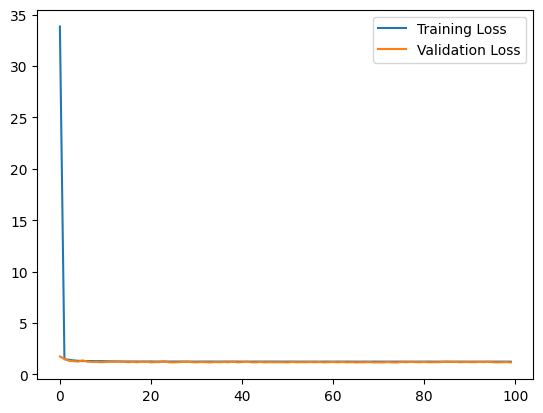

In [26]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



In [27]:
# Generate predictions
predictions = model.predict(X_val)

# Calculate F1 score and AUPRC for validation set
f1_scores = []
auprcs = []

for i in range(num_tasks):
    y_true = y_val[:, i]
    y_pred = (predictions[i] > 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    auprc = average_precision_score(y_true, predictions[i])
    f1_scores.append(f1)
    auprcs.append(auprc)

avg_f1 = sum(f1_scores) / num_tasks
avg_auprc = sum(auprcs) / num_tasks

print(f"Avg F1-Score: {avg_f1:.4f}")
print(f"Avg AUPRC: {avg_auprc:.4f}")


245/245 [==============================] - 0s 1ms/step
Avg F1-Score: 0.3456
Avg AUPRC: 0.3774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
